# <center>PREDICCIÓN DEL RIESGO Y COMPLICACIONES CAUSADOS POR UNA TIROIDECTOMIA</center>
### <center>Helena Puente Díaz</center>

Este proyecto consiste en predecir, a partir de un conjunto de datos obtenidos de cada paciente, si este puede presentar o no complicaciones posteriores a la realización de una tiroidectomía, y qué tipo de complicaciones se van a producir. 

Del mismo modo, a partir de dichas compliaciones se predice la estancia de cada paciente en el hospital.

En primer lugar se importan los módulos necesarios y se lee el documento donde se encuentran los datos, que son analizados posteriormente.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import statistics as stat
import collections

from datetime import datetime
from dateutil.relativedelta import relativedelta

In [2]:
data = pd.read_excel('tiroidectomia.xlsx')
data.head()

,NHC,FECHA_NACIMIENTO,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,81655,1974-09-27,H,NaN,[Paratiroides u otros],no complicaciones,50687244M,[33978272G],2
1,431990,1951-08-28,M,NaN,[tiroidectomia total],no complicaciones,02710503e,"[02654603N, 01118322Q]",4
2,580635,1978-10-14,M,NaN,[tiroidectomia total],Hipocalcemia,50687244M,"[44389372Q, 12748779V]",2
3,239217,1968-06-01,M,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
4,538678,1945-06-19,M,NaN,[Paratiroides u otros],"rec , Hematoma",50850155F,[51415768g],2


Las variables obtenidas para realizar el análisis son las siguientes:
- NHC: Número de historia clinica.
- Fecha de nacimiento: Edad del paciente.
- Género: Sexo del paciente.
- Bethesda: Categorización del nódulo tiroideo, eficaz para identificar el riesgo de malignidad. (Explicado con detalle posteriormente).
- Cirugía: Tipo de cirugía que se realiza al paciente.
- Complicaciones: Complicaciones que se producen después de la cirugía.
- Id del cirujano: Número de identificación del cirujano que realiza la operación.
- Id del ayudante: Número de identificación de los asistentes.
- Estancia: Número de días posteriores a la cirugía que el paciente permanece en el hospital.

Tal y como se puede observar, es necesario hacer un pre-procesado de estos datos ya que, por ejemplo, existen variables con 
valores 0 o NaN que no son de utilidad (representan un valor que falta) o, en el caso de la fecha de nacimiento, se considera de mayor relevancia la edad.

# <center><font style="color:steelblue">1. PRE-PROCESADO DE LOS DATOS</font></center>

En este apartado se llevan a cabo las operaciones comentadas anteriormente.

### Eliminación de pacientes con variables con valor 0 o NaN

In [3]:
#Conteo de los valores 0 en cada variable
data.isnull().sum() 

NHC                   0
FECHA_NACIMIENTO      0
GENERO                0
Bethesda            175
CIRUGIA              72
COMPLICACIONES       72
ID_CIRUJANO           1
ID_AYUDANTE           2
ESTANCIA              0
dtype: int64

Las varibales Bethesda, cirugía, complicaciones, id_cirujano e id_ayudante presentan valores 0. En las celdas posteriores se descartan.

In [4]:
#Eliminación de los valores NaN y 0
data = data.dropna()
data = data[(data[['Bethesda']] != 0).all(axis=1)]

In [5]:
#Comprobación de eliminación correcta de los valores Nan
(data == np.NaN).sum(axis=0)

NHC                 0
FECHA_NACIMIENTO    0
GENERO              0
Bethesda            0
CIRUGIA             0
COMPLICACIONES      0
ID_CIRUJANO         0
ID_AYUDANTE         0
ESTANCIA            0
dtype: int64

In [6]:
#Comprobación de eliminación correcta de los valores 0
(data == 0).sum(axis=0) 

NHC                 0
FECHA_NACIMIENTO    0
GENERO              0
Bethesda            0
CIRUGIA             0
COMPLICACIONES      0
ID_CIRUJANO         0
ID_AYUDANTE         0
ESTANCIA            0
dtype: int64

In [7]:
data.head()
new_index = range(0, data.shape[0])
data.index = new_index
data.head()

,NHC,FECHA_NACIMIENTO,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,1968-06-01,M,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,1961-12-03,M,2.0,[tiroidectomia total],rec,50687244M,"[50330643L, 08400498R]",2
2,530005,1946-01-09,M,2.0,[tiroidectomia total],Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,1951-09-15,M,6.0,[tiroidectomia total],no complicaciones,44389372Q,[02874996L],2
4,538134,1957-04-15,M,2.0,[hemitiroidectomia izquierda],no complicaciones,50330643L,"[51415768g, 08974671W]",2


In [8]:
data.shape

(302, 9)

### Conversión de la fecha de nacimiento en edad

In [9]:
listaedad = []
for i in data.FECHA_NACIMIENTO:
    edad = relativedelta(datetime.now(), datetime(i.year, i.month, i.day))
    listaedad.append(edad.years)

In [12]:
#¡ATENCIÓN! --> Runear dos veces para que se muestre correctamente la edad
contador = 0

for i in data["FECHA_NACIMIENTO"]:
    for j in range(0, len(listaedad)):
        index = j + contador
        data['FECHA_NACIMIENTO'] = data['FECHA_NACIMIENTO'].replace(i, int(listaedad[index]))
        contador = contador + 1
        break

In [13]:
data.head()

,NHC,FECHA_NACIMIENTO,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,M,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,59.0,M,2.0,[tiroidectomia total],rec,50687244M,"[50330643L, 08400498R]",2
2,530005,75.0,M,2.0,[tiroidectomia total],Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,69.0,M,6.0,[tiroidectomia total],no complicaciones,44389372Q,[02874996L],2
4,538134,63.0,M,2.0,[hemitiroidectomia izquierda],no complicaciones,50330643L,"[51415768g, 08974671W]",2


In [14]:
#Cambio del nombre de la columna FECHA_NACIMIENTO a EDAD
data = data.rename(columns = {"FECHA_NACIMIENTO": "EDAD"})
data.head(20)

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,M,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,59.0,M,2.0,[tiroidectomia total],rec,50687244M,"[50330643L, 08400498R]",2
2,530005,75.0,M,2.0,[tiroidectomia total],Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,69.0,M,6.0,[tiroidectomia total],no complicaciones,44389372Q,[02874996L],2
4,538134,63.0,M,2.0,[hemitiroidectomia izquierda],no complicaciones,50330643L,"[51415768g, 08974671W]",2
5,43045,55.0,M,6.0,[tiroidectomia total],"Cicatriz Hipertrofica , Seroma",08974671W,"[50330643L, 51415768g]",2
6,532295,54.0,M,2.0,[tiroidectomia total],Hipocalcemia,50850155F,[44389372Q],2
7,94024,54.0,M,2.0,[tiroidectomia total],no complicaciones,12748779V,"[02874996L, 51415768g]",2
8,41685,48.0,H,4.0,[tiroidectomia total],no complicaciones,50850155F,[00677341Z],2
9,445674,81.0,M,2.0,[hemitiroidectomia izquierda],Hematoma,12748779V,"[00677341Z, 02874996L]",2


# <center><font style="color:steelblue">2. CODIFICACIÓN</font></center>

Al tratarse la mayoría de las variables de texto plano, la dificultad para operar con ellas es elevada. Por este motivo, en este apartado se lleva a cabo la codificación de las mismas, con el objetivo de facilitar el posterior tratamiento y análisis.

Para cada una de las variables se lleva a cabo una codificación numérica en función de los datos que presenta.

### Codificación de la variable género

In [15]:
data['GENERO'] = data['GENERO'].replace(['H', 'M'],[-1, 1])

In [16]:
data.head(10)

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,1,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,59.0,1,2.0,[tiroidectomia total],rec,50687244M,"[50330643L, 08400498R]",2
2,530005,75.0,1,2.0,[tiroidectomia total],Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,69.0,1,6.0,[tiroidectomia total],no complicaciones,44389372Q,[02874996L],2
4,538134,63.0,1,2.0,[hemitiroidectomia izquierda],no complicaciones,50330643L,"[51415768g, 08974671W]",2
5,43045,55.0,1,6.0,[tiroidectomia total],"Cicatriz Hipertrofica , Seroma",08974671W,"[50330643L, 51415768g]",2
6,532295,54.0,1,2.0,[tiroidectomia total],Hipocalcemia,50850155F,[44389372Q],2
7,94024,54.0,1,2.0,[tiroidectomia total],no complicaciones,12748779V,"[02874996L, 51415768g]",2
8,41685,48.0,-1,4.0,[tiroidectomia total],no complicaciones,50850155F,[00677341Z],2
9,445674,81.0,1,2.0,[hemitiroidectomia izquierda],Hematoma,12748779V,"[00677341Z, 02874996L]",2


### Codificación de la variable cirugía

In [17]:
data['CIRUGIA'] = data['CIRUGIA'].replace(['[tiroidectomia total]', '[hemitiroidectomia izquierda]', 
                                           '[hemitiroidectomia derecha]', '[Completar tiroidectomia]', 
                                           '[Paratiroides u otros]'],[1, 2, 3, 4, 5])

In [18]:
data.head()

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,1,2.0,1,"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,59.0,1,2.0,1,rec,50687244M,"[50330643L, 08400498R]",2
2,530005,75.0,1,2.0,1,Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,69.0,1,6.0,1,no complicaciones,44389372Q,[02874996L],2
4,538134,63.0,1,2.0,2,no complicaciones,50330643L,"[51415768g, 08974671W]",2


### Codificación de la variable complicaciones. CODIFICACIÓN BINARIA

En el caso de esta variable se lleva a cabo una primera codificación binaria, donde se establece: 
- El número 0 en aquellos pacientes donde no ha habido complicaciones
- 1 en aquellos donde si se han producido complicaciones 

Posteriomente, se analiza un modelo clasificador con esta codificación. Con este se busca que a partir de ciertas variables se prediga si el paciente puede presentar o no complicaciones posteriores a la realización de una tiroidectomía

Más adelante, se realiza una nueva codificación donde cada complicación se asocia a un número distinto y, de nuevo, se introduce al modelo para observar sus prestaciones. En este caso, se busca que el modelo establezca el tipo de complicación que se va a producir.

In [19]:
for i in data["COMPLICACIONES"]:
    if i == 'no complicaciones':
        data['COMPLICACIONES'] = data['COMPLICACIONES'].replace(i, 0)
             
for i in data["COMPLICACIONES"]:
    if i != 0:
        data['COMPLICACIONES'] = data['COMPLICACIONES'].replace(i, 1)

In [20]:
data.head()

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,1,2.0,1,1,08400498R,"[12748779V, 08974671W]",2
1,77245,59.0,1,2.0,1,1,50687244M,"[50330643L, 08400498R]",2
2,530005,75.0,1,2.0,1,1,44389372Q,"[50850155F, 12748779V]",2
3,532841,69.0,1,6.0,1,0,44389372Q,[02874996L],2
4,538134,63.0,1,2.0,2,0,50330643L,"[51415768g, 08974671W]",2


In [21]:
data["COMPLICACIONES"].value_counts() 

0    203
1     99
Name: COMPLICACIONES, dtype: int64

### Codificación de la variable id_cirujano

In [22]:
data['ID_CIRUJANO'] = data['ID_CIRUJANO'].replace(['00677341Z', '00827260L', '01118322Q', 
                                                  '02654603N', '02710503e', '02710503E',
                                                  '02874996L', '02883999Y', '02884329Z',
                                                  '05966991d', '05999727Q', '08400498R',
                                                  '08949321K', '08974671W', '12748779V',
                                                  '44389372Q', '47041950G', '47450369N',
                                                  '50330643L', '50687244M', '50850155F',
                                                  '51415768g', '51415768G', '52977204Q',
                                                  '53606685X'],[1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23])

In [23]:
data.head()

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,1,2.0,1,1,11,"[12748779V, 08974671W]",2
1,77245,59.0,1,2.0,1,1,19,"[50330643L, 08400498R]",2
2,530005,75.0,1,2.0,1,1,15,"[50850155F, 12748779V]",2
3,532841,69.0,1,6.0,1,0,15,[02874996L],2
4,538134,63.0,1,2.0,2,0,18,"[51415768g, 08974671W]",2


### Codificación de la variable id_ayudante

In [24]:
data['ID_AYUDANTE'] = data['ID_AYUDANTE'].replace(['[00677341Z, 02874996L]', '[00677341Z, 08974671W]', '[00677341Z, 47450369N]', 
                                                  '[00677341Z, X4768987Y]', '[00677341Z]', '[00827260L, 02883999Y]',
                                                  '[00827260L, X4768987Y]', '[00827260L]', '[01118322Q, 02654603N]',
                                                  '[01118322Q, 02884329Z]', '[01118322Q, 05966991d]', '[01118322Q, 47041950G]',
                                                  '[01118322Q, 52977204Q]', '[01118322Q]', '[02654603N, 01118322Q]',
                                                  '[02654603N, 02710503E]', '[02654603N, 04497329R]', '[02654603N, 05966991d]',
                                                  '[02654603N, 52977204Q]', '[02654603N]', '[02710503E, 01118322Q]',
                                                  '[02710503E, 02654603N]', '[02710503E, 02710503E]', '[02710503E, 52977204Q]',
                                                  '[02710503E]', '[02874996L, 12748779V]', '[02874996L, 14303494R]',
                                                  '[02874996L, 44389372Q]', '[02874996L, 51415768g]', '[02874996L, X4768987Y]',
                                                  '[02874996L, X9849952H]', '[02874996L]', '[02883999Y, 44389372Q]',
                                                  '[02883999Y]', '[02884329Z, 01118322Q]', '[02884329Z, 52977204Q]',
                                                  '[02884329Z]', '[05436273Q]', '[05966991d, 01118322Q, 01118322Q, 02710503E]',
                                                  '[05966991d, 01118322Q]', '[05966991d, 02884329Z]', '[05966991d, 05966991d]',
                                                  '[05966991d, 52977204Q]', '[05966991d]', '[05999727Q, 01118322Q, 05999727Q, 01118322Q]',
                                                  '[05999727Q, 01118322Q]', '[05999727Q, 05966991d, 05999727Q]', '[05999727Q, 05966991d]',
                                                  '[05999727Q]', '[08400498R, 47450369N]', '[08400498R]', '[08949321K, 00677341Z]',
                                                  '[08949321K, 08974671W]', '[08949321K, 12748779V]', '[08949321K, 50330643L]',
                                                  '[08949321K]', '[08974671W, 02874996L]', '[08974671W]', '[12748779V, 02883999Y]',
                                                  '[12748779V, 08974671W]', '[14303494R]', '[33978272G]', '[44389372Q, 00827260L, 00677341Z]',
                                                  '[44389372Q, 02874996L]', '[44389372Q, 12748779V]', '[44389372Q, 50687244M]', 
                                                  '[44389372Q, 51415768G]', '[44389372Q, X4768987Y]', '[44389372Q]', '[46877344D, X4768987Y]',
                                                  '[47041950G, 01118322Q]', '[47041950G, 02654603N]', '[47041950G, 52977204Q, 02884329Z]', 
                                                  '[47041950G]', '[47450369N, 02874996L]', '[47450369N]', '[49689803M]', '[50330643L, 08400498R]',
                                                  '[50330643L, 51415768g]', '[50687244M, 47450369N]', '[50687244M, 50330643L]', 
                                                  '[50687244M, X4768987Y]', '[50687244M]', '[50850155F, 00677341Z]', '[50850155F, 12748779V]',
                                                  '[50850155F]', '[51415768g, 08974671W]', '[51415768g]', '[51415768G]',
                                                  '[52977204Q, 01118322Q, 52977204Q, 01118322Q]', '[52977204Q, 01118322Q]', '[52977204Q, 02654603N]',
                                                  '[52977204Q, 02884329Z]', '[52977204Q, 52977204Q]', '[52977204Q]', '[53543295P, 47450369N]',
                                                  '[53606685X, 01118322Q]', '[X4768987Y, 00677341Z]', '[X4768987Y, 02883999Y]', '[X4768987Y]'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 87, 88, 89, 90, 91, 92, 93, 93, 94, 95, 96, 97])

In [25]:
data.head()

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,1,2.0,1,1,11,59,2
1,77245,59.0,1,2.0,1,1,19,77,2
2,530005,75.0,1,2.0,1,1,15,84,2
3,532841,69.0,1,6.0,1,0,15,31,2
4,538134,63.0,1,2.0,2,0,18,86,2


# <center><font style="color:steelblue">3. ANÁLISIS EXPLORATORIO</font></center>

Con los datos codificados el siguiente paso es realizar el análisis. Con este apartado se quiere observar los rangos de cada variable, medias, desviaciones, etc.

In [26]:
edad = data['EDAD']
genero = data['GENERO']
bethesda = data['Bethesda']
cirugia = data['CIRUGIA']
complicaciones = data['COMPLICACIONES']
id_cirujano = data['ID_CIRUJANO']
id_ayudante = data['ID_AYUDANTE']
estancia = data['ESTANCIA']

### GRÁFICOS

En primer lugar, se dibujan diferentes gráficos para estudiar de forma visual las variables. Los gráficos elegidos son:
- Histograma: Gráfico que indica la frecuencia de un hecho mediante una distribución de los datos.
- Diagrama de cajas y bigotes (Boxplot): Describe varias características importantes, como la dispersión y simetría. Establece  los valores mínimo y máximo, el primer, segundo y tercer cuartil (Q1, Q2 y Q3) y valores atípicos.
- Diagrama de barras: Similar al histograma pero varía su representación.
- Gráfico circular: Representar porcentajes y proporciones.

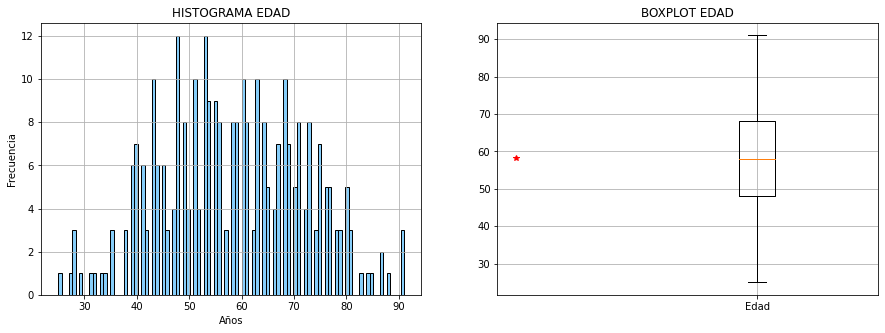

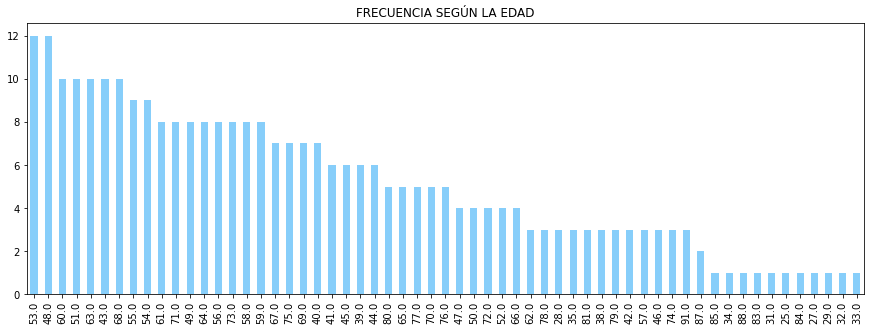

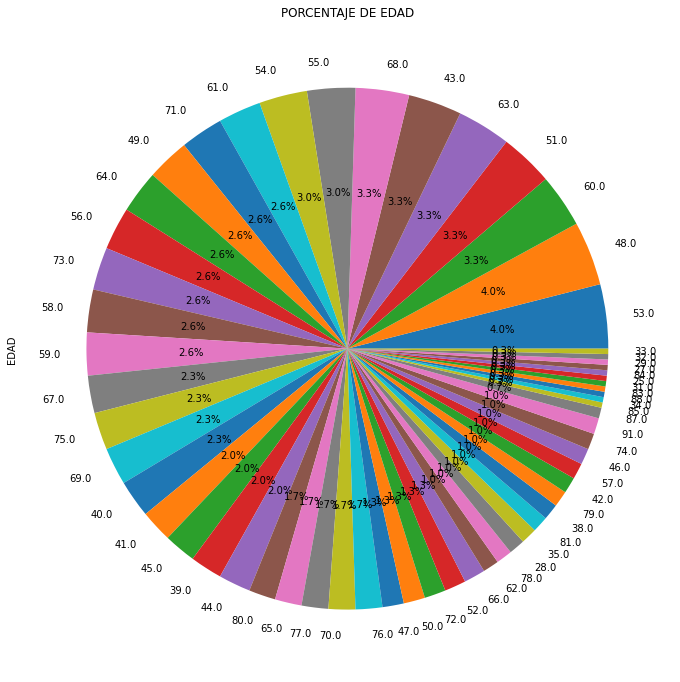

In [27]:
#-------------------------------------------------------- EDAD --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA EDAD')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.hist(edad, bins=100, alpha=1, color = "lightskyblue", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT EDAD')
plt.boxplot(edad)
plt.xticks([1], ['Edad'])
plt.plot(np.average(edad), color='r', marker='*')
plt.grid(True)
plt.show()

plt.figure(figsize=[15,5])
edad.value_counts().plot.bar(title='FRECUENCIA SEGÚN LA EDAD', color='lightskyblue')
plt.show()

plt.figure(figsize=[12,12])
edad.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE EDAD')
plt.show()

A la vista de los resultados obtenidos, se puede observar que el rango de edad va desde los 25 años hasta los 91. Además, existen dos edades donde la operación es más frecuente: 53 y 48 años.

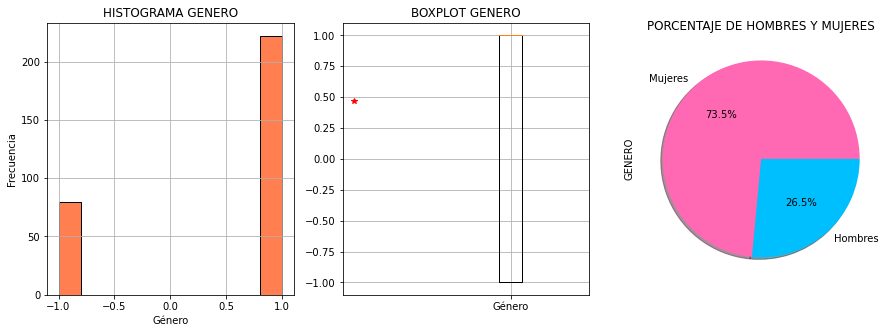

In [28]:
#-------------------------------------------------------- GENERO --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA GENERO')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.hist(genero, bins=10, alpha=1, color = "coral", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT GENERO')
plt.boxplot(genero)
plt.xticks([1], ['Género'])
plt.plot(np.average(genero), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
genero.value_counts().plot.pie(labels=['Mujeres', 'Hombres'], colors=['hotpink', 'deepskyblue'], autopct='%1.1f%%', shadow=True, title='PORCENTAJE DE HOMBRES Y MUJERES')
plt.show()

Se puede observar que la operación de tiroidectomía es mucho más frecuente en mujeres que en hombres.

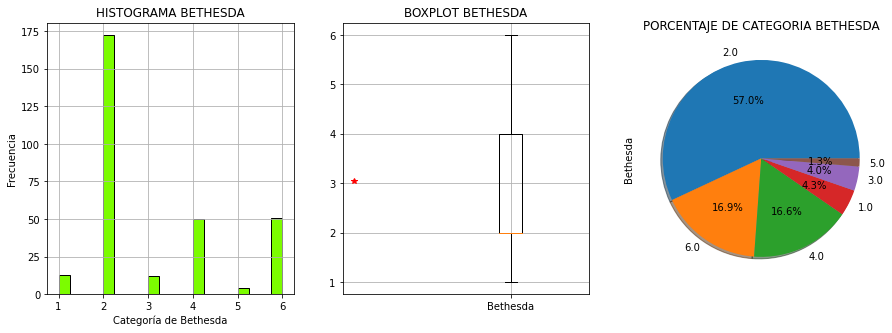

In [29]:
#-------------------------------------------------------- BETHESDA --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA BETHESDA')
plt.xlabel('Categoría de Bethesda')
plt.ylabel('Frecuencia')
plt.hist(bethesda, bins=20, alpha=1, color = "lawngreen", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT BETHESDA')
plt.boxplot(bethesda)
plt.xticks([1], ['Bethesda'])
plt.plot(np.average(bethesda), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
bethesda.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title='PORCENTAJE DE CATEGORIA BETHESDA')
plt.show()

Respecto al Bethesda, existen 6 categorías:
- Categoría I: No hay diagnóstico o el material es indufciente.
- Categoría II: Benigno. Implica seguimiento clínico.
- Categoría III: Lesión folicular o significado incierto. Se repite la punción.
- Categoría IV: Neoplasia folicular o probable neoplasia folicular. Lobectomía, se extirpa la parte afectada.
- Categoría V: Sospecha de malignidad. Lobectomía o tiroidectomía menor que total.
- Categoría VI: Maligno. Tiroidectomía total.

Observando los resultados, la categoría más frecuente es la II, benigna, seguida de la IV y VI, donde ya se realiza una cirugía. 

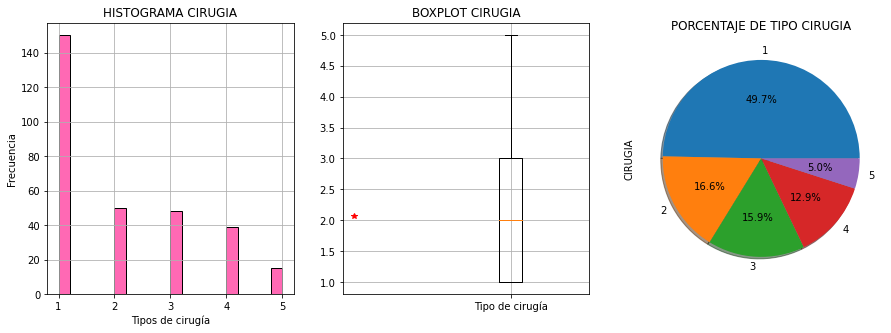

In [30]:
#-------------------------------------------------------- CIRUGIA --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA CIRUGIA')
plt.xlabel('Tipos de cirugía')
plt.ylabel('Frecuencia')
plt.hist(cirugia, bins=20, alpha=1, color = "hotpink", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(132)
plt.title('BOXPLOT CIRUGIA')
plt.boxplot(cirugia)
plt.xticks([1], ['Tipo de cirugía'])
plt.plot(np.average(cirugia), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
cirugia.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title='PORCENTAJE DE TIPO CIRUGIA')
plt.show()

La cirugía predominante es la de tipo 1, siendo esta una tiroidectomía total, realizada aproximadamente el 50% de las veces.

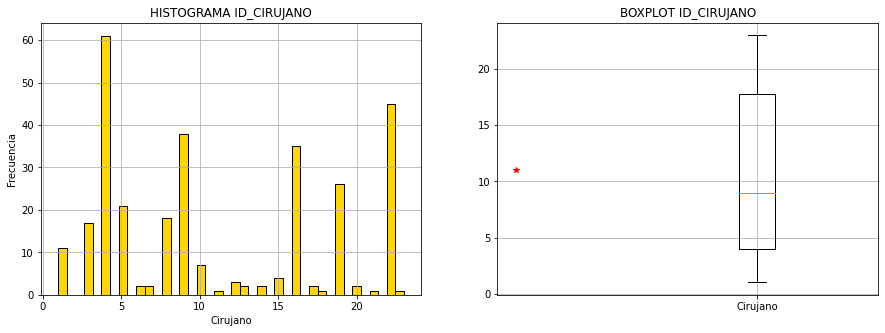

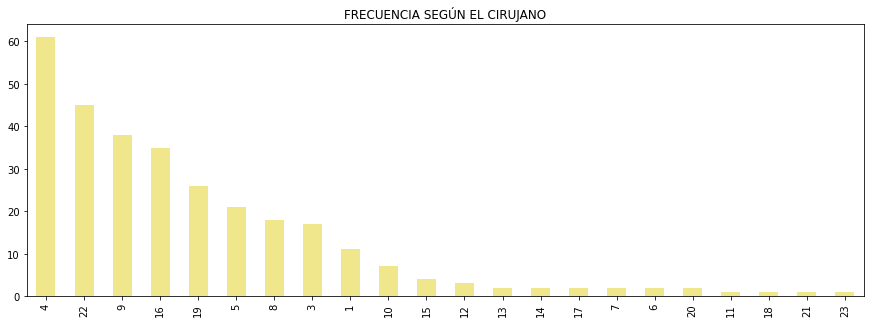

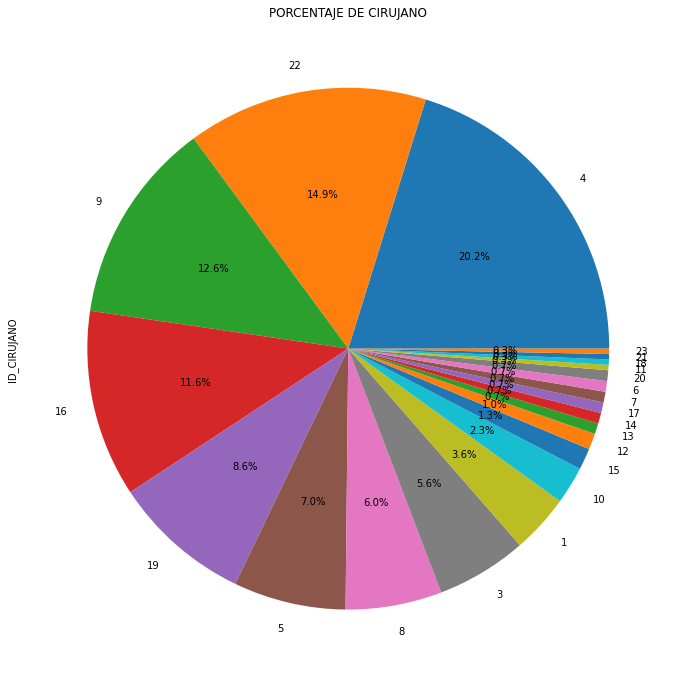

In [31]:
#-------------------------------------------------------- ID_CIRUJANO --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA ID_CIRUJANO')
plt.xlabel('Cirujano')
plt.ylabel('Frecuencia')
plt.hist(id_cirujano, bins=40, alpha=1, color = "gold", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT ID_CIRUJANO')
plt.boxplot(id_cirujano)
plt.xticks([1], ['Cirujano'])
plt.plot(np.average(id_cirujano), color='r', marker='*')
plt.grid(True)
plt.show()

plt.figure(figsize=[15,5])
id_cirujano.value_counts().plot.bar(title='FRECUENCIA SEGÚN EL CIRUJANO', color='khaki')
plt.show()

plt.figure(figsize=[12,12])
id_cirujano.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE CIRUJANO')
plt.show()

Los resultados indican que los cirujanos que más operaciones han realizado son los siguientes:
- Cirujano codificado con el número 4: 02654603N
- Cirujano codificado con el número 22: 52977204Q
- Cirujano codificado con el número 9: 05966991D

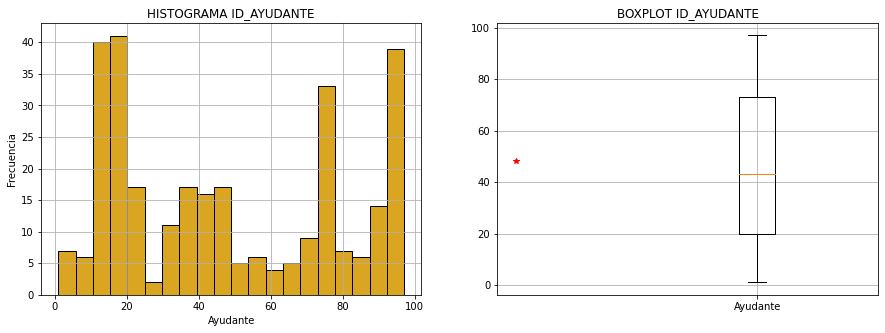

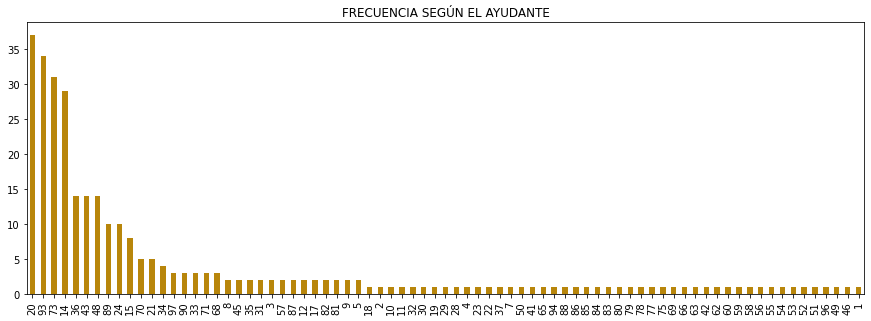

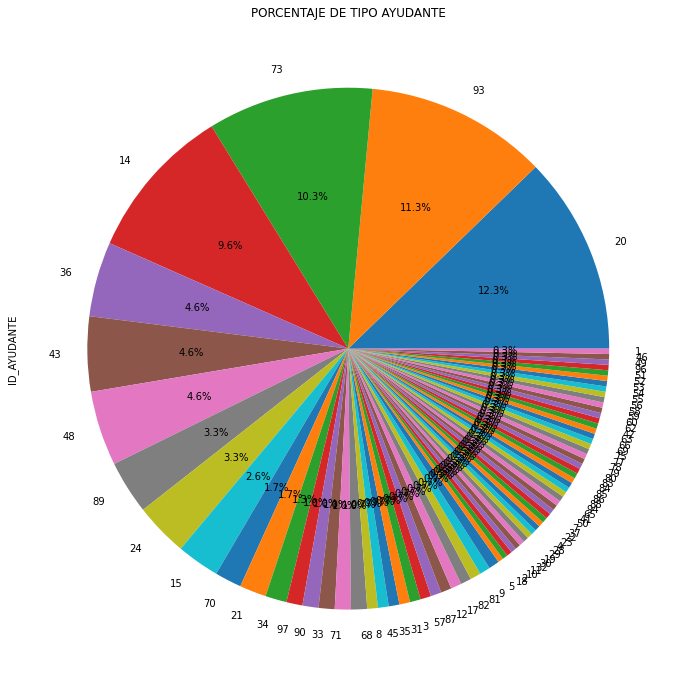

In [32]:
#-------------------------------------------------------- ID_AYUDANTE --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA ID_AYUDANTE')
plt.xlabel('Ayudante')
plt.ylabel('Frecuencia')
plt.hist(id_ayudante, bins=20, alpha=1, color = "goldenrod", edgecolor = 'black', linewidth=1)
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT ID_AYUDANTE')
plt.boxplot(id_ayudante)
plt.xticks([1], ['Ayudante'])
plt.plot(np.average(id_ayudante), color='r', marker='*')
plt.grid(True)
plt.show()

plt.figure(figsize=[15,5])
id_ayudante.value_counts().plot.bar(title='FRECUENCIA SEGÚN EL AYUDANTE', color='darkgoldenrod')
plt.show()

plt.figure(figsize=[12,12])
id_ayudante.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE TIPO AYUDANTE')
plt.show()

En el caso de los ayudantes, el que más operaciones ha realizado es: 02654603N

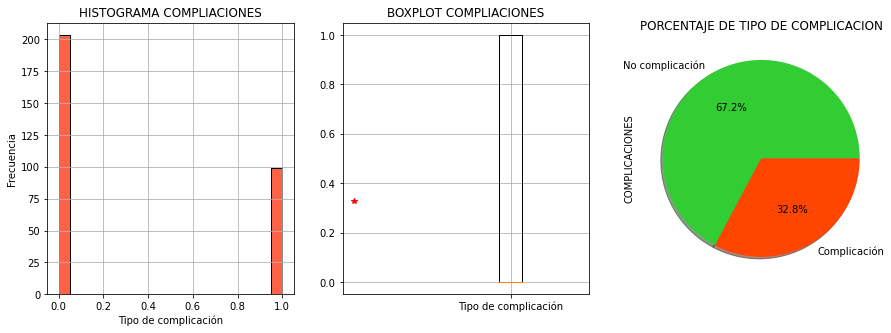

In [33]:
#-------------------------------------------------------- COMPLICACIONES --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA COMPLIACIONES')
plt.xlabel('Tipo de complicación')
plt.ylabel('Frecuencia')
plt.hist(complicaciones, bins=20, alpha=1, color = "tomato", edgecolor = 'black', linewidth=1)
plt.grid(True)

blue_diamond = dict(markerfacecolor='b', marker='D')
plt.subplot(132)
plt.title('BOXPLOT COMPLIACIONES')
plt.boxplot(complicaciones, flierprops=blue_diamond)
plt.xticks([1], ['Tipo de complicación'])
plt.plot(np.average(complicaciones), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
complicaciones.value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True, title='PORCENTAJE DE TIPO DE COMPLICACION')
plt.show()

A la vista de los resultados obtenidos con la variable complicaciones codificada como una variable binaria, se concluye que existe mayor probabilidad, 67% comparado con un 33%, de que no se produzca una complicación después de la cirugía.

In [35]:
complicaciones.value_counts()

0    203
1     99
Name: COMPLICACIONES, dtype: int64

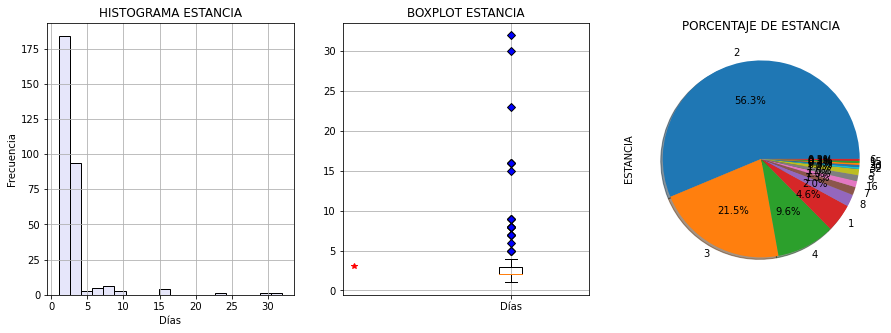

In [36]:
#-------------------------------------------------------- ESTANCIA --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA ESTANCIA')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.hist(estancia, bins=20, alpha=1, color = "lavender", edgecolor = 'black', linewidth=1)
plt.grid(True)

blue_diamond = dict(markerfacecolor='b', marker='D')
plt.subplot(132)
plt.title('BOXPLOT ESTANCIA')
plt.boxplot(estancia, flierprops=blue_diamond)
plt.xticks([1], ['Días'])
plt.plot(np.average(estancia), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
estancia.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title='PORCENTAJE DE ESTANCIA')
plt.show()

En este caso se pueden observar outliers, valores atípicos marcados con los rombos azules. A continuación se analizan estos valores para ver si tienen o no sentido.

In [37]:
data[data.ESTANCIA >= 5]

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
71,98968,68.0,-1,2.0,1,0,5,93,8
97,38573,61.0,1,2.0,1,1,5,20,7
111,473489,48.0,1,6.0,4,0,4,93,16
113,434495,73.0,1,2.0,1,1,9,20,8
132,357197,60.0,-1,4.0,4,0,4,43,15
138,582209,51.0,1,6.0,1,1,22,15,8
139,435890,91.0,1,2.0,1,0,4,88,9
145,225524,41.0,1,2.0,1,1,8,73,23
148,80863,44.0,-1,4.0,4,0,5,73,30
170,89254,43.0,1,4.0,4,0,4,93,16


Tal y como se muestra en la tabla superior, existe un número elevado de pacientes que no presentan complicaciones (codificación 0) cuya estancia es superior a 5 días. Esto se considera erróneo, por tanto, aquellos pacientes con número de complicación 0, son eliminados a continuación. 

In [38]:
data_sinoutlier = data.drop([71, 111, 132, 139, 148, 170, 197, 217, 249, 265, 287, 293])

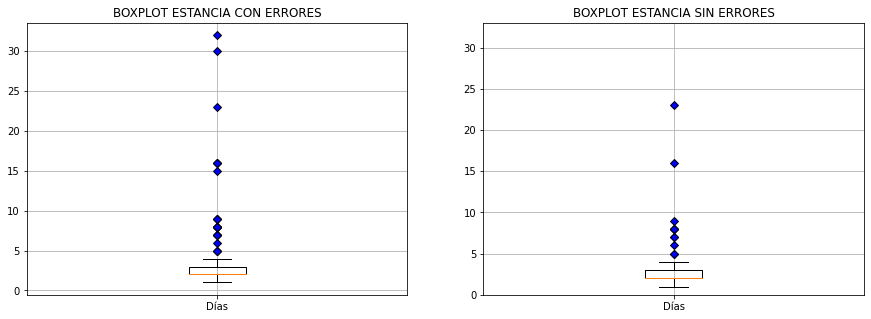

In [39]:
plt.figure(figsize=[15,5])
blue_diamond = dict(markerfacecolor='b', marker='D')
plt.subplot(121)
plt.title('BOXPLOT ESTANCIA CON ERRORES')
plt.boxplot(estancia, flierprops=blue_diamond)
plt.xticks([1], ['Días'])
plt.grid(True)

plt.subplot(122)
plt.title('BOXPLOT ESTANCIA SIN ERRORES')
plt.boxplot(data_sinoutlier.ESTANCIA, flierprops=blue_diamond)
plt.xticks([1], ['Días'])
plt.ylim(0, 33) 
plt.grid(True)

In [43]:
data_sinoutlier.COMPLICACIONES.value_counts()

0    191
1     99
Name: COMPLICACIONES, dtype: int64

Los outliers que se muestran como resultado final en el boxplot derecho se consideran coherentes, por tanto, las nuevas gráficas para esta variable son:

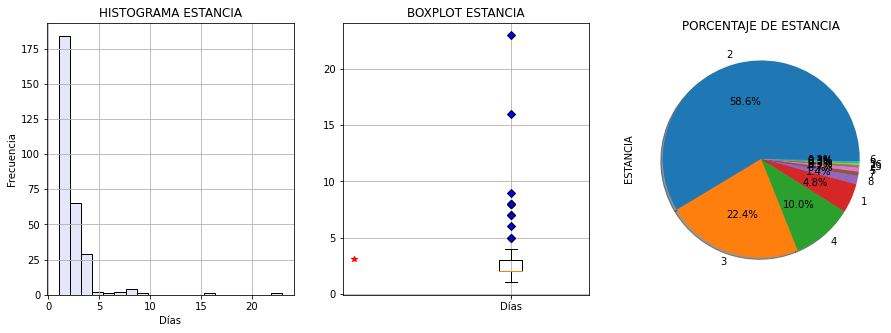

In [40]:
#-------------------------------------------------------- ESTANCIA --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(131)
plt.title('HISTOGRAMA ESTANCIA')
plt.xlabel('Días')
plt.ylabel('Frecuencia')
plt.hist(data_sinoutlier.ESTANCIA, bins=20, alpha=1, color = "lavender", edgecolor = 'black', linewidth=1)
plt.grid(True)

blue_diamond = dict(markerfacecolor='b', marker='D')
plt.subplot(132)
plt.title('BOXPLOT ESTANCIA')
plt.boxplot(data_sinoutlier.ESTANCIA, flierprops=blue_diamond)
plt.xticks([1], ['Días'])
plt.plot(np.average(estancia), color='r', marker='*')
plt.grid(True)

plt.subplot(133)
data_sinoutlier.ESTANCIA.value_counts().plot.pie(autopct='%1.1f%%', shadow=True, title='PORCENTAJE DE ESTANCIA')
plt.show()

Para estos nuevos resultados, se observa que el 91% de los pacientes permanece ingresado en el hospital después de la complicación entre 2 y 4 días.

### Diagramas de dispresión

Para representar los diagramas de dispersión se elimina la variable NHC, ya que no es de interés ver su relación con el resto de variables, pues indica únicamente el número de identificación del paciente.

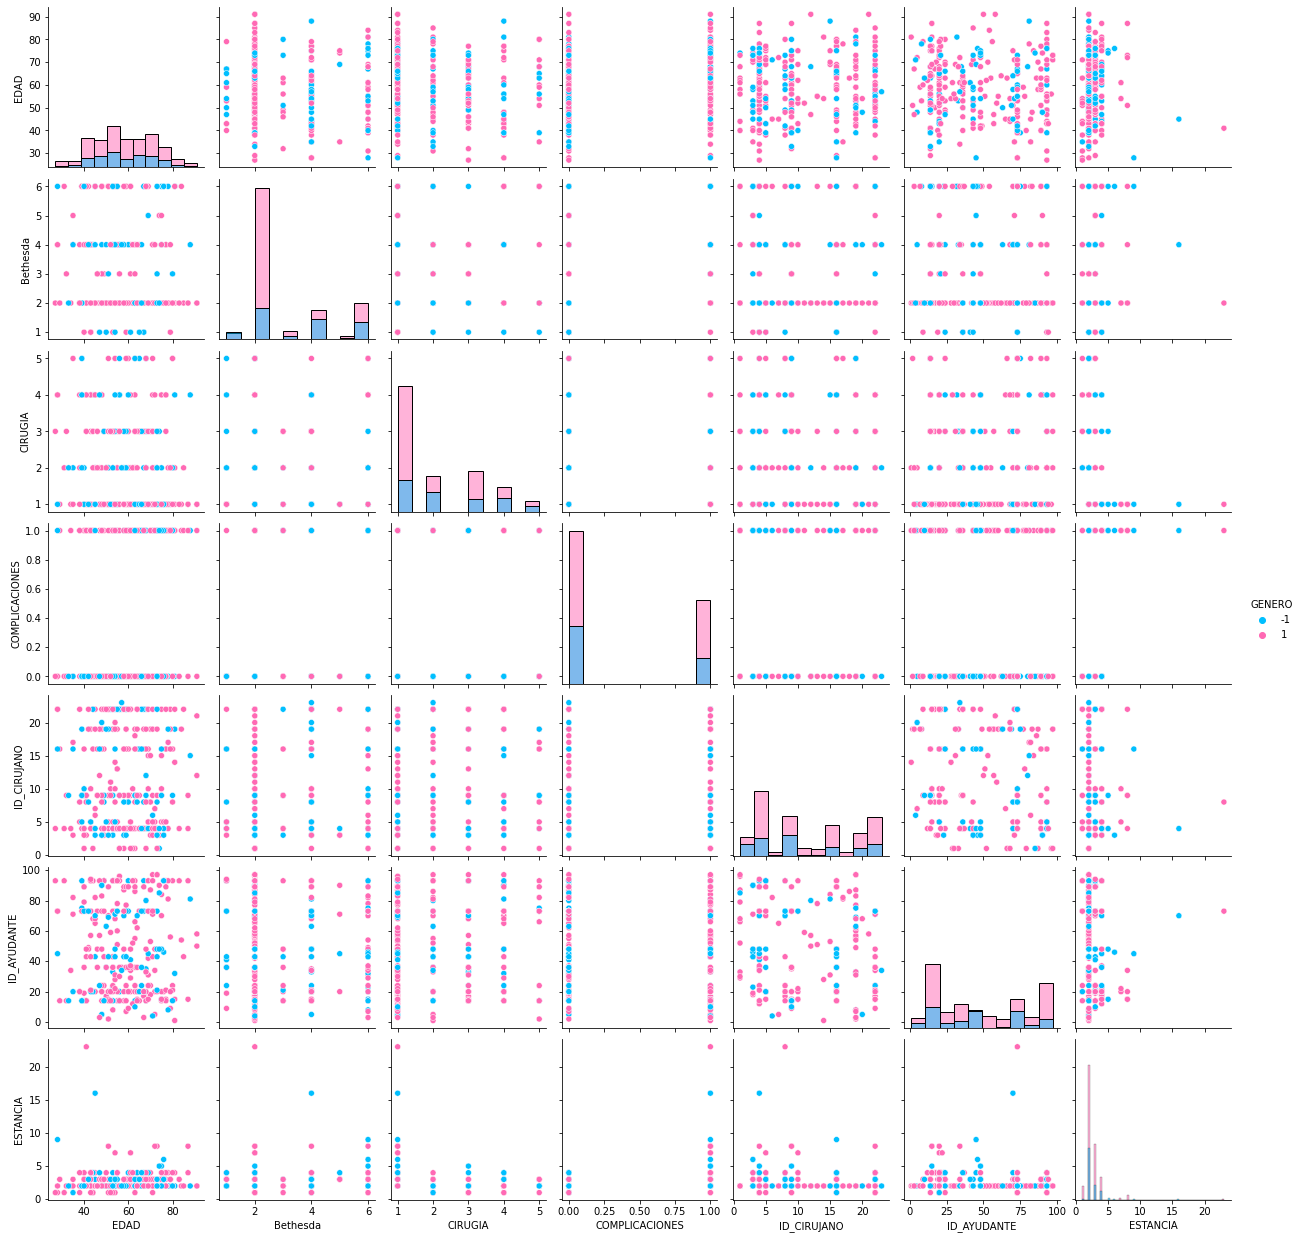

In [39]:
data_nonhc = data_sinoutlier.drop(columns=['NHC'])
sns.pairplot(data_nonhc, hue="GENERO", palette={-1:'deepskyblue', 1:'hotpink'}, diag_kind="hist")

### CÁLCULO DE ESTADÍSTICOS

A continuación, se calculan diferentes estadísticos sobre las variables como:
- Rango, con valores máximo y mínimo
- Media
- Mediana
- Moda
- Desviación estándar
- Varianza
- Primer, segundo, tercer cuartil (Q1, Q2 y Q3)

#### Variable edad

In [40]:
rango_edad = data_nonhc.EDAD.describe()[7] - data_nonhc.EDAD.describe()[3]
mediana_edad = edad.median()
moda_edad = stat.mode(edad)
var_edad = edad.var()

print('El rango para la variable edad es: ', data_nonhc.EDAD.describe()[7], '-', data_nonhc.EDAD.describe()[3], '=', rango_edad) 
print('La media es: ', data_nonhc.EDAD.describe()[1])
print('La mediana es: ', mediana_edad)
print('La moda es: ', moda_edad)
print('La varianza es: ', var_edad)
print('La desviación estándar es: ', data_nonhc.EDAD.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.EDAD.describe()[4], ',', data_nonhc.EDAD.describe()[5], ',', data_nonhc.EDAD.describe()[6])

El rango para la variable edad es:  91.0 - 27.0 = 64.0
La media es:  58.262068965517244
La mediana es:  58.0
La moda es:  48.0
La varianza es:  184.2486193923126
La desviación estándar es:  13.409195156149819
Los percentiles 25, 50 y 75 (respectivamente) son:  48.0 , 58.0 , 68.75


#### Variable género

In [41]:
rango_genero = data_nonhc.GENERO.describe()[7] + data_nonhc.GENERO.describe()[3]
mediana_genero = genero.median()
moda_genero = stat.mode(genero)
var_genero = genero.var()

print('El rango para la variable genero es: ', data_nonhc.GENERO.describe()[7], data_nonhc.GENERO.describe()[3], '=', rango_genero) 
print('La media es: ', data_nonhc.GENERO.describe()[1])
print('La mediana es: ', mediana_genero)
print('La moda es: ', moda_genero)
print('La varianza es: ', var_genero)
print('La desviación estándar es: ', data_nonhc.GENERO.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.GENERO.describe()[4], ',', data_nonhc.GENERO.describe()[5], ',', data_nonhc.GENERO.describe()[6])

El rango para la variable genero es:  1.0 -1.0 = 0.0
La media es:  0.4827586206896552
La mediana es:  1.0
La moda es:  1
La varianza es:  0.781500957074652
La desviación estándar es:  0.8772672910874608
Los percentiles 25, 50 y 75 (respectivamente) son:  -1.0 , 1.0 , 1.0


#### Variable Bethesda

In [42]:
rango_bethesda = data_nonhc.Bethesda.describe()[7] - data_nonhc.Bethesda.describe()[3]
mediana_bethesda = bethesda.median()
moda_bethesda = stat.mode(bethesda)
var_bethesda = bethesda.var()

print('El rango para la variable Bethesda es: ', data_nonhc.Bethesda.describe()[7], '-', data_nonhc.Bethesda.describe()[3], '=', rango_bethesda) 
print('La media es: ', data_nonhc.Bethesda.describe()[1])
print('La mediana es: ', mediana_bethesda)
print('La moda es: ', moda_bethesda)
print('La varianza es: ', var_bethesda)
print('La desviación estándar es: ', data_nonhc.Bethesda.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.Bethesda.describe()[4], ',', data_nonhc.Bethesda.describe()[5], ',', data_nonhc.Bethesda.describe()[6])

El rango para la variable Bethesda es:  6.0 - 1.0 = 5.0
La media es:  3.027586206896552
La mediana es:  2.0
La moda es:  2.0
La varianza es:  2.486512948009945
La desviación estándar es:  1.5803500448220178
Los percentiles 25, 50 y 75 (respectivamente) son:  2.0 , 2.0 , 4.0


#### Variable cirugía

In [43]:
rango_cirugia = data_nonhc.CIRUGIA.describe()[7] - data_nonhc.CIRUGIA.describe()[3]
mediana_cirugia = cirugia.median()
moda_cirugia = stat.mode(cirugia)
var_cirugia = cirugia.var()

print('El rango para la variable cirugia es: ', data_nonhc.CIRUGIA.describe()[7], '-', data_nonhc.CIRUGIA.describe()[3], '=', rango_cirugia) 
print('La media es: ', data_nonhc.CIRUGIA.describe()[1])
print('La mediana es: ', mediana_cirugia)
print('La moda es: ', moda_cirugia)
print('La varianza es: ', var_cirugia)
print('La desviación estándar es: ', data_nonhc.CIRUGIA.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.CIRUGIA.describe()[4], ',', data_nonhc.CIRUGIA.describe()[5], ',', data_nonhc.CIRUGIA.describe()[6])

El rango para la variable cirugia es:  5.0 - 1.0 = 4.0
La media es:  2.0620689655172413
La mediana es:  2.0
La moda es:  1
La varianza es:  1.6197333392004576
La desviación estándar es:  1.2628341260155176
Los percentiles 25, 50 y 75 (respectivamente) son:  1.0 , 2.0 , 3.0


#### Variable complicaciones

In [44]:
rango_complicaciones = data_nonhc.COMPLICACIONES.describe()[7] - data_nonhc.COMPLICACIONES.describe()[3]
mediana_complicaciones = complicaciones.median()
moda_complicaciones = stat.mode(complicaciones)
var_complicaciones = complicaciones.var()

print('El rango para la variable complicaciones es: ', data_nonhc.COMPLICACIONES.describe()[7], '-', data_nonhc.COMPLICACIONES.describe()[3], '=', rango_complicaciones) 
print('La media es: ', data_nonhc.COMPLICACIONES.describe()[1])
print('La mediana es: ', mediana_complicaciones)
print('La moda es: ', moda_complicaciones)
print('La varianza es: ', var_complicaciones)
print('La desviación estándar es: ', data_nonhc.COMPLICACIONES.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.COMPLICACIONES.describe()[4], ',', data_nonhc.COMPLICACIONES.describe()[5], ',', data_nonhc.COMPLICACIONES.describe()[6])

El rango para la variable complicaciones es:  1.0 - 0.0 = 1.0
La media es:  0.3413793103448276
La mediana es:  0.0
La moda es:  0
La varianza es:  0.22108424457107653
La desviación estándar es:  0.4749920715996928
Los percentiles 25, 50 y 75 (respectivamente) son:  0.0 , 0.0 , 1.0


#### Variable estancia

In [45]:
rango_estancia = data_nonhc.ESTANCIA.describe()[7] - data_nonhc.ESTANCIA.describe()[3]
mediana_estancia = estancia.median()
moda_estancia = stat.mode(estancia)
var_estancia = estancia.var()

print('El rango para la variable estancia es: ', data_nonhc.ESTANCIA.describe()[7], '-', data_nonhc.ESTANCIA.describe()[3], '=', rango_estancia) 
print('La media es: ', data_nonhc.ESTANCIA.describe()[1])
print('La mediana es: ', mediana_estancia)
print('La moda es: ', moda_estancia)
print('La varianza es: ', var_estancia)
print('La desviación estándar es: ', data_nonhc.ESTANCIA.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.ESTANCIA.describe()[4], ',', data_nonhc.ESTANCIA.describe()[5], ',', data_nonhc.ESTANCIA.describe()[6])

El rango para la variable estancia es:  23.0 - 1.0 = 22.0
La media es:  2.6724137931034484
La mediana es:  2.0
La moda es:  2
La varianza es:  10.68378033486612
La desviación estándar es:  1.839474227522399
Los percentiles 25, 50 y 75 (respectivamente) son:  2.0 , 2.0 , 3.0


#### Variable Id_cirujano

In [46]:
rango_id_cirujano = data_nonhc.ID_CIRUJANO.describe()[7] - data_nonhc.ID_CIRUJANO.describe()[3]
mediana_id_cirujano = id_cirujano.median()
moda_id_cirujano = stat.mode(id_cirujano)
var_id_cirujano = id_cirujano.var()

print('El rango para la variable id_cirujano es: ', data_nonhc.ID_CIRUJANO.describe()[7], '-', data_nonhc.ID_CIRUJANO.describe()[3], '=', rango_id_cirujano) 
print('La media es: ', data_nonhc.ID_CIRUJANO.describe()[1])
print('La mediana es: ', mediana_id_cirujano)
print('La moda es: ', moda_id_cirujano)
print('La varianza es: ', var_id_cirujano)
print('La desviación estándar es: ', data_nonhc.ID_CIRUJANO.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.ID_CIRUJANO.describe()[4], ',', data_nonhc.ID_CIRUJANO.describe()[5], ',', data_nonhc.ID_CIRUJANO.describe()[6])

El rango para la variable id_cirujano es:  23.0 - 1.0 = 22.0
La media es:  11.120689655172415
La mediana es:  9.0
La moda es:  4
La varianza es:  49.632967371454974
La desviación estándar es:  7.063423957277281
Los percentiles 25, 50 y 75 (respectivamente) son:  4.0 , 9.0 , 19.0


#### Variable Id_ayudante

In [47]:
rango_id_ayudante = data_nonhc.ID_AYUDANTE.describe()[7] - data_nonhc.ID_AYUDANTE.describe()[3]
mediana_id_ayudante = id_ayudante.median()
moda_id_ayudante = stat.mode(id_ayudante)
var_id_ayudante = id_ayudante.var()

print('El rango para la variable id_ayudante es: ', data_nonhc.ID_AYUDANTE.describe()[7], '-', data_nonhc.ID_AYUDANTE.describe()[3], '=', rango_id_ayudante) 
print('La media es: ', data_nonhc.ID_AYUDANTE.describe()[1])
print('La mediana es: ', mediana_id_ayudante)
print('La moda es: ', moda_id_ayudante)
print('La varianza es: ', var_id_ayudante)
print('La desviación estándar es: ', data_nonhc.ID_AYUDANTE.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc.ID_AYUDANTE.describe()[4], ',', data_nonhc.ID_AYUDANTE.describe()[5], ',', data_nonhc.ID_AYUDANTE.describe()[6])

El rango para la variable id_ayudante es:  97.0 - 1.0 = 96.0
La media es:  48.01724137931034
La mediana es:  43.0
La moda es:  20
La varianza es:  888.8292006776529
La desviación estándar es:  29.661114419836885
Los percentiles 25, 50 y 75 (respectivamente) son:  20.0 , 43.0 , 73.0


### CORRELACIÓN ENTRE VARIABLES

La correlación indica la relación lineal y proporcionalidad entre dos variables. El cálculo de la correlación es útil para determinar que variables están relacionadas con complicaciones y, así, establecer aquellas que se introducen al modelo.

In [48]:
data_nonhc.corr()

,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
EDAD,1.000000,0.000974,-0.118561,-0.130515,0.167899,0.019758,-0.028651,0.012892
GENERO,0.000974,1.000000,-0.119456,-0.102102,0.043238,0.043614,0.041833,-0.041037
Bethesda,-0.118561,-0.119456,1.000000,0.013010,-0.049466,0.041548,-0.058031,0.036448
CIRUGIA,-0.130515,-0.102102,0.013010,1.000000,-0.173893,-0.035367,0.019278,-0.263809
COMPLICACIONES,0.167899,0.043238,-0.049466,-0.173893,1.000000,-0.028824,-0.133780,0.227441
ID_CIRUJANO,0.019758,0.043614,0.041548,-0.035367,-0.028824,1.000000,-0.280184,-0.060329
ID_AYUDANTE,-0.028651,0.041833,-0.058031,0.019278,-0.133780,-0.280184,1.000000,-0.028815
ESTANCIA,0.012892,-0.041037,0.036448,-0.263809,0.227441,-0.060329,-0.028815,1.000000


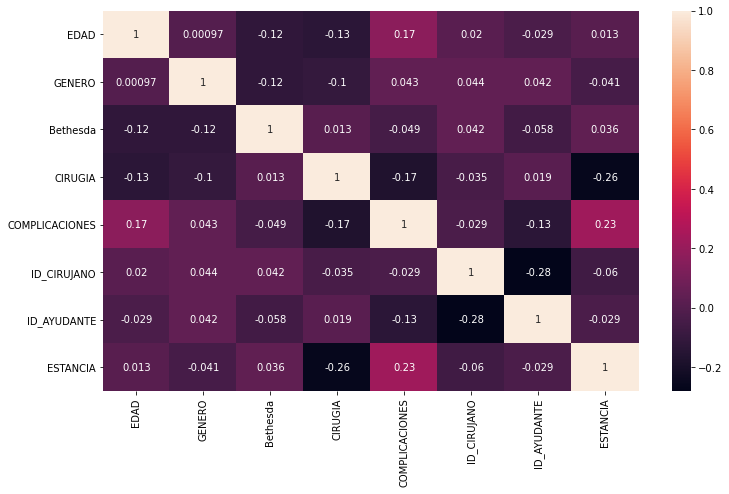

In [49]:
plt.figure(figsize=[12,7])
correlation_mat = data_nonhc.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

Al tratarse de variables categóricas (variable que puede tomar un valor de posibles valores, asignando a cada unidad individual a un grupo en particular o categoría), la matriz de correlaciones no aporta información relevante. Por este motivo, se plantea utilizar el test chi-cuadrado para observar la correlación.

#### Test de la Chi-Cuadrado

Este test se utiliza para ver la correlación que existe entre dos variables nominales o de un nivel superior (variables que se tratan en este proyecto). Un ejemplo de estas variables es: género (hombre o mujer) o la presencia de complicación (sí o no).

La hipótesis nula (H0) indica que ambas variables son independientes, mientras que la hipótesis alternativa (H1) indica que las variables tienen algún grado de asociación o relación.
El resumen de lo comentado es el siguiente:

- Si el p-valor < 0.05, hay diferencias significativas, es decir, hay relación entre las variables.
- Si el p-valor > 0.05, no hay diferencias significativas, es decir, no existe relación entre las variables. 

In [50]:
from scipy.stats import chi2_contingency

Se crean las tablas de contingencia entre las variables. Se estudia la correlación entre todas las parejas de variables por si existe alguna de estas que pueda estar relacionada y no se considere "coherente" a simple vista.

In [51]:
#-------------------------------------------- EDAD --------------------------------------------
tabla_contingencia1 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['GENERO'])
tabla_contingencia2 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['Bethesda'])
tabla_contingencia3 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['CIRUGIA'])
tabla_contingencia4 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['COMPLICACIONES'])
tabla_contingencia5 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['ID_CIRUJANO'])
tabla_contingencia6 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['ID_AYUDANTE'])
tabla_contingencia7 = pd.crosstab(data_nonhc['EDAD'], data_nonhc['ESTANCIA'])

#-------------------------------------------- GENERO --------------------------------------------
tabla_contingencia8 = pd.crosstab(data_nonhc['GENERO'], data_nonhc['Bethesda'])
tabla_contingencia9 = pd.crosstab(data_nonhc['GENERO'], data_nonhc['CIRUGIA'])
tabla_contingencia10 = pd.crosstab(data_nonhc['GENERO'], data_nonhc['COMPLICACIONES'])
tabla_contingencia11 = pd.crosstab(data_nonhc['GENERO'], data_nonhc['ID_CIRUJANO'])
tabla_contingencia12 = pd.crosstab(data_nonhc['GENERO'], data_nonhc['ID_AYUDANTE'])
tabla_contingencia13 = pd.crosstab(data_nonhc['GENERO'], data_nonhc['ESTANCIA'])

#-------------------------------------------- BETHESDA --------------------------------------------
tabla_contingencia14 = pd.crosstab(data_nonhc['Bethesda'], data_nonhc['CIRUGIA'])
tabla_contingencia15 = pd.crosstab(data_nonhc['Bethesda'], data_nonhc['COMPLICACIONES'])
tabla_contingencia16 = pd.crosstab(data_nonhc['Bethesda'], data_nonhc['ID_CIRUJANO'])
tabla_contingencia17 = pd.crosstab(data_nonhc['Bethesda'], data_nonhc['ID_AYUDANTE'])
tabla_contingencia18 = pd.crosstab(data_nonhc['Bethesda'], data_nonhc['ESTANCIA'])

#-------------------------------------------- CIRUGIA --------------------------------------------
tabla_contingencia19 = pd.crosstab(data_nonhc['CIRUGIA'], data_nonhc['COMPLICACIONES'])
tabla_contingencia20 = pd.crosstab(data_nonhc['CIRUGIA'], data_nonhc['ID_CIRUJANO'])
tabla_contingencia21 = pd.crosstab(data_nonhc['CIRUGIA'], data_nonhc['ID_AYUDANTE'])
tabla_contingencia22 = pd.crosstab(data_nonhc['CIRUGIA'], data_nonhc['ESTANCIA'])

#-------------------------------------------- COMPLICACIONES --------------------------------------------
tabla_contingencia23 = pd.crosstab(data_nonhc['COMPLICACIONES'], data_nonhc['ID_CIRUJANO'])
tabla_contingencia24 = pd.crosstab(data_nonhc['COMPLICACIONES'], data_nonhc['ID_AYUDANTE'])
tabla_contingencia25 = pd.crosstab(data_nonhc['COMPLICACIONES'], data_nonhc['ESTANCIA'])

#-------------------------------------------- ID_CIRUJANO --------------------------------------------
tabla_contingencia26 = pd.crosstab(data_nonhc['ID_CIRUJANO'], data_nonhc['ID_AYUDANTE'])
tabla_contingencia27 = pd.crosstab(data_nonhc['ID_CIRUJANO'], data_nonhc['ESTANCIA'])

#-------------------------------------------- ID_AYUDANTE --------------------------------------------
tabla_contingencia28 = pd.crosstab(data_nonhc['ID_AYUDANTE'], data_nonhc['ESTANCIA'])

In [52]:
p_valor1 = chi2_contingency(tabla_contingencia1)[1]
p_valor2 = chi2_contingency(tabla_contingencia2)[1]
p_valor3 = chi2_contingency(tabla_contingencia3)[1]
p_valor4 = chi2_contingency(tabla_contingencia4)[1]
p_valor5 = chi2_contingency(tabla_contingencia5)[1]
p_valor6 = chi2_contingency(tabla_contingencia6)[1]
p_valor7 = chi2_contingency(tabla_contingencia7)[1]
p_valor8 = chi2_contingency(tabla_contingencia8)[1]
p_valor9 = chi2_contingency(tabla_contingencia9)[1]
p_valor10 = chi2_contingency(tabla_contingencia10)[1]
p_valor11 = chi2_contingency(tabla_contingencia11)[1]
p_valor12 = chi2_contingency(tabla_contingencia12)[1]
p_valor13 = chi2_contingency(tabla_contingencia13)[1]
p_valor14 = chi2_contingency(tabla_contingencia14)[1]
p_valor15 = chi2_contingency(tabla_contingencia15)[1]
p_valor16 = chi2_contingency(tabla_contingencia16)[1]
p_valor17 = chi2_contingency(tabla_contingencia17)[1]
p_valor18 = chi2_contingency(tabla_contingencia18)[1]
p_valor19 = chi2_contingency(tabla_contingencia19)[1]
p_valor20 = chi2_contingency(tabla_contingencia20)[1]
p_valor21 = chi2_contingency(tabla_contingencia21)[1]
p_valor22 = chi2_contingency(tabla_contingencia22)[1]
p_valor23 = chi2_contingency(tabla_contingencia23)[1]
p_valor24 = chi2_contingency(tabla_contingencia24)[1]
p_valor25 = chi2_contingency(tabla_contingencia25)[1]
p_valor26 = chi2_contingency(tabla_contingencia26)[1]
p_valor27 = chi2_contingency(tabla_contingencia27)[1]
p_valor28 = chi2_contingency(tabla_contingencia28)[1]

lista_pvalor = [p_valor1, p_valor2, p_valor3, p_valor4, p_valor5, p_valor6, p_valor7, p_valor8, p_valor19, p_valor10, p_valor11,
               p_valor12, p_valor13, p_valor14, p_valor15, p_valor16, p_valor17, p_valor18, p_valor19, p_valor20, p_valor21,
               p_valor22, p_valor23, p_valor24, p_valor25, p_valor26, p_valor27, p_valor28]

for i in range(len(lista_pvalor)):
    p_valor = lista_pvalor[i]
               
    if p_valor < 0.05:
        print('Las variables de la tabla de contingencia', i+1, 'están relacionadas')

Las variables de la tabla de contingencia 2 están relacionadas
Las variables de la tabla de contingencia 3 están relacionadas
Las variables de la tabla de contingencia 5 están relacionadas
Las variables de la tabla de contingencia 8 están relacionadas
Las variables de la tabla de contingencia 9 están relacionadas
Las variables de la tabla de contingencia 13 están relacionadas
Las variables de la tabla de contingencia 14 están relacionadas
Las variables de la tabla de contingencia 19 están relacionadas
Las variables de la tabla de contingencia 22 están relacionadas
Las variables de la tabla de contingencia 25 están relacionadas
Las variables de la tabla de contingencia 26 están relacionadas
Las variables de la tabla de contingencia 28 están relacionadas


Por tanto, las variables relacionadas son:
- Edad con Bethesda
- Edad con cirugía
- Edad con el cirujano
- Edad con la estancia
- Género con Bethesda
- Género con cirugía
- Género con estancia
- Bethesda con cirugía
- Cirugía con complicaciones
- Cirugía con estancia
- Complicaciones con estancia
- Id del cirujano con el id del ayudante
- Id del ayudante con la estancia

### COMPARACIÓN CON LA BIBLIGRAFÍA

#### Relación entre categoría Bethesda menor o igual que 3 y complicaciones

En la bibliografía se indica que una clasificación Bethesda mayor a 3 está relacionada con la aparición de complicaciones (explicado con mayor detalle en el apartado de discusiones del artículo). A continuación se analiza si, con los datos presentados, esto es cierto.

In [54]:
bethesda_3 = data_nonhc[data_nonhc.Bethesda <= 3]
b3_compl = bethesda_3[bethesda_3.COMPLICACIONES == 0]

print('El número de pacientes con Bethesda inferior a 3 es: ', bethesda_3.shape[0], 'y el número de pacientes con Bethesda inferior a 3 y sin complicaciones es: ', b3_compl.shape[0])

El número de pacientes con Bethesda inferior a 3 es:  191 y el número de pacientes con Bethesda inferior a 3 y sin complicaciones es:  122


A la vista de los resultados obtenidos, se puede afirmar que estos datos concuerdan con la bibliografía.

#### Relación entre la experiencia del cirujano y el riesgo de complicaciones

Otra afirmación que se lleva a cabo en la bibliografía determina que cuanto mayor experiencia presente el cirujano, más exitosa será la tiroidectomía realizada y por lo tanto menor riesgo de complicación y menos días de hospitalización sufrirá el paciente 

En este caso, la experiencia del cirujano se evalua a partir del número de operaciones que haya realizado, es decir, a mayor número de operaciones, mayor experiencia. El cirujano que más cirugías ha realizado ha sido el codificado con el número 4, seguido del 22, y uno que ha realizado menos es el número 1 (datos obtenidos de los gráficos superiores).

In [55]:
cirujano1 = data_nonhc[data_nonhc.ID_CIRUJANO == 4]
cirujano2 = data_nonhc[data_nonhc.ID_CIRUJANO == 22]
cirujano3 = data_nonhc[data_nonhc.ID_CIRUJANO == 1]

c1_compl = cirujano1[cirujano1.COMPLICACIONES == 0]
c2_compl = cirujano2[cirujano2.COMPLICACIONES == 0]
c3_compl = cirujano3[cirujano3.COMPLICACIONES == 0]

print('El número de cirugías realizadas por el cirujano 4: ', cirujano1.shape[0], 'y el número de pacientes sin complicaciones postquirúrgicas es: ', c1_compl.shape[0])
print('El número de cirugías realizadas por el cirujano 22: ', cirujano2.shape[0], 'y el número de pacientes sin complicaciones postquirúrgicas es: ', c2_compl.shape[0])
print('El número de cirugías realizadas por el cirujano 1: ', cirujano3.shape[0], 'y el número de pacientes sin complicaciones postquirúrgicas es: ', c3_compl.shape[0])

El número de cirugías realizadas por el cirujano 4:  56 y el número de pacientes sin complicaciones postquirúrgicas es:  38
El número de cirugías realizadas por el cirujano 22:  44 y el número de pacientes sin complicaciones postquirúrgicas es:  34
El número de cirugías realizadas por el cirujano 1:  11 y el número de pacientes sin complicaciones postquirúrgicas es:  5


Observando los resultados podemos ver que los cirujanos con más experiencia, tienen un mayor porcentaje de cirugías existosas, es decir, sin complicaciones. Siendo los resultados los siguientes:

- Cirujano 4: El 68% de sus cirugías no presentan complicaciones.
- Cirujano 22: El 77% de sus cirugías no presentan complicación.
- Cirujano 1: El 45% de sus cirugías no presentan complicaciones.

Se puede concluir de nuevo con que los datos obtenidos concuerdan con la bibliografía, afirmando que, a mayor número de operaciones, mayor experiencia y, por tanto, menos riesgo de complicación.

# <center><font style="color:steelblue">4. MODELO CLASIFICADOR</font></center>
## <center><font style="color:steelblue">4.1. CLASIFICADOR BINARIO: COMPLICACIÓN O NO COMPLICACIÓN</font></center>

Para esta parte del modelo se lleva a cabo un clasificador binario que, como su propio nombre indica, predice a partir de las variables introducidas si el paciente puede presentar o no complicaciones posteriores a la realización de una tiroidectomía.


### SGDClassifier MODELO 1

Las variables relacionadas directamente con COMPLICACIONES son: CIRUGIA y ESTANCIA. Se considera que la estancia es una consecuencia de la complicación, por tanto no será introducida en el modelo. 
Por otro lado, la variable CIRUGIA está relacionada con: EDAD, GENERO Y BETHESDA. 

Por tanto, las variables introducidas primeramente son:
- Edad
- Género
- Bethesda
- Cirugía


Para la realización del modelo lo primero que se lleva a cabo es la división de los datos en un conjunto de entrenamiento y en un conjunto de test (evaluación). Se utilizan 2/3 de los datos para el entramiento y la parte restante, 1/3, para la evaluación.

#### Division de los datos en train y test

In [53]:
print('El número total de pacientes es: ', data_nonhc.shape[0])
print('El número total de pacientes sin complicaciones es: ', data_nonhc["COMPLICACIONES"].value_counts()[0])
print('El número total de pacientes con complicaciones es: ', data_nonhc["COMPLICACIONES"].value_counts()[1])

El número total de pacientes es:  290
El número total de pacientes sin complicaciones es:  191
El número total de pacientes con complicaciones es:  99


In [54]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [86]:
x = data_nonhc[["EDAD", "GENERO", "Bethesda", "CIRUGIA"]]
y = data_nonhc["COMPLICACIONES"]

#Mezcla de los datos, esto garantiza que todos los cross-validation folds sean similares
x, y = shuffle(x, y, random_state=0)

#Cantidad de datos para training: 2/3, cantidad de datos para test: 1/3
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

print('El número de pacientes para el conjunto de entrenanimiento es: ', x_train.shape[0])
print('El número de pacientes para el conjunto de test es: ', x_test.shape[0])

El número de pacientes para el conjunto de entrenanimiento es:  203
El número de pacientes para el conjunto de test es:  87


En primer lugar se observa si las complicaciones están balanceadas en los conjuntos divididos (train y test).

Para el conjunto de TRAIN se tienen 135 pacientes sin complicaciones y  68  con complicaciones.
Para el conjunto de TEST se tienen 56 pacientes sin complicaciones y  31  con complicaciones.


<AxesSubplot:ylabel='COMPLICACIONES'>

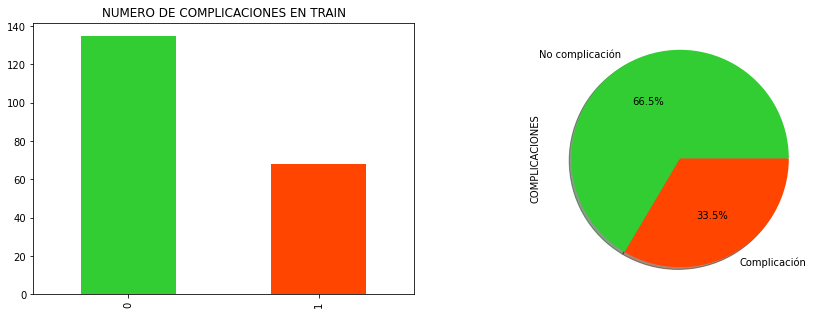

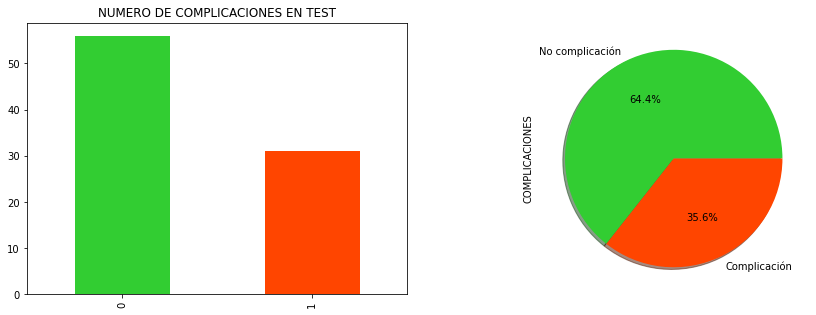

In [87]:
print('Para el conjunto de TRAIN se tienen', y_train.value_counts()[0], 'pacientes sin complicaciones y ', y_train.value_counts()[1], ' con complicaciones.')
print('Para el conjunto de TEST se tienen', y_test.value_counts()[0], 'pacientes sin complicaciones y ', y_test.value_counts()[1], ' con complicaciones.')

plt.figure(figsize=[15,5])
plt.subplot(121)
y_train.value_counts().plot.bar(title='NUMERO DE COMPLICACIONES EN TRAIN', color=['limegreen', 'orangered'])

plt.subplot(122)
y_train.value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
y_test.value_counts().plot.bar(title='NUMERO DE COMPLICACIONES EN TEST', color=['limegreen', 'orangered'])

plt.subplot(122)
y_test.value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

Se puede observar que ambas clases están más o menos balanceadas respecto al porcentaje que tiene cada una de pacientes con y sin complicaciones. 

Sin embargo, dentro de cada uno los conjuntos de entramiento y test, existe una desbalanceo en los datos, es decir, la proporción de pacientes que no presentan complicación tras la cirugía y los que si es muy diferente. Por tanto, es necesario realizar un balanceo.

Este balanceo se lleva a cabo ya que los clasificadores generalmente son sensibles a las proporciones de las diferentes clases. Como consecuencia, estos algoritmos tienden a favorecer la clase con la mayor proporción de observaciones (conocida como clase mayoritaria), lo cual puede derivar en métricas de exactitud erróneas.

#### Balanceo de clases y entreno del clasificador binario

In [61]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Para el balanceo de clases se incluye el parámetro class_weight al modelo, estableciendo este como 'balanced' para evitar así el problema del desbalanceo comentado anteriormente.

In [88]:
#Entreno del clasificador
sgd_clf = SGDClassifier(random_state=42, class_weight='balanced')
sgd_clf.fit(x_train, y_train)

SGDClassifier(class_weight='balanced', random_state=42)

#### Predicciones usando el conjunto de test

<AxesSubplot:ylabel='REALIDAD'>

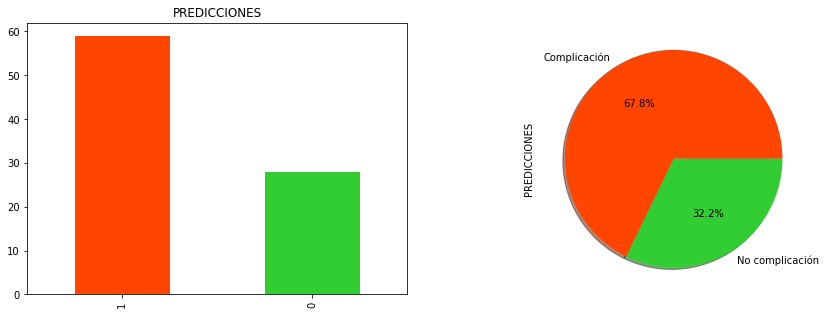

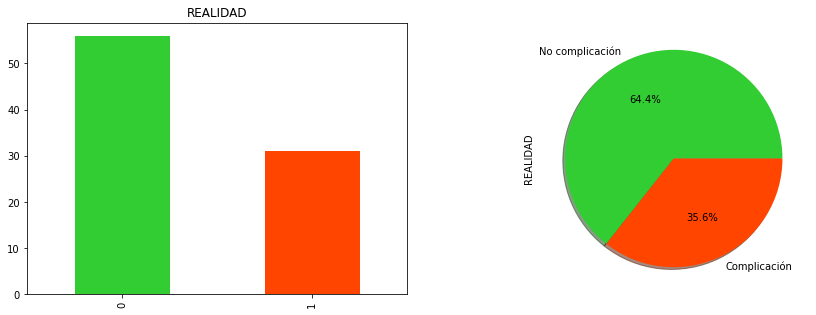

In [89]:
y_predicciones = sgd_clf.predict(x_test)
tabla = pd.DataFrame({"PREDICCIONES": y_predicciones, "REALIDAD": y_test})

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla['PREDICCIONES'].value_counts().plot.bar(title='PREDICCIONES', color=['orangered', 'limegreen'])

plt.subplot(122)
tabla['PREDICCIONES'].value_counts().plot.pie(labels=['Complicación', 'No complicación'], colors=['orangered', 'limegreen'], autopct='%1.1f%%', shadow=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla['REALIDAD'].value_counts().plot.bar(title='REALIDAD', color=['limegreen', 'orangered'])

plt.subplot(122)
tabla['REALIDAD'].value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

#### Accuracy

El accuracy, precisión en español, es una medida que indica el hecho de ser exacto o correcto, la capacidad de hacer algo sin cometer errores. Permite evaluar las prestaciones del modelo.

In [90]:
print('El accuracy obtenido es:', accuracy_score(y_test, y_predicciones))

El accuracy obtenido es: 0.4942528735632184


A la vista del resultado obtenido en el accuracy, se puede concluir que el modelo no es muy bueno, es decir, no clasifica lo suficientemente bien. Para corroborar se muestra a continuación la matriz de confusión, sensibilidad, especificidad y curva ROC.

#### Matriz de confusión

Permite la visualización del desempeño de un algoritmo. Cada columna de la matriz representa el número de predicciones de cada clase, mientras que cada fila representa los valores reales de cada clase. Uno de los beneficios de las matrices de confusión es que facilitan ver si el sistema está confundiendo dos clases.

En este caso, la distribución de la matriz de confusión se explica a continuación junto a los resultados obtenidos.

La matriz de confusión es:
 [[20 36]
 [ 8 23]]


<Figure size 432x288 with 0 Axes>

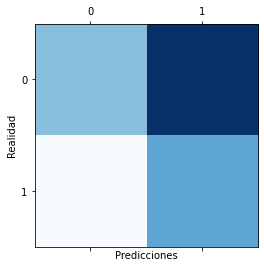

In [91]:
matriz = confusion_matrix(y_test, y_predicciones)
print('La matriz de confusión es:\n', matriz)

plt.figure()
plt.matshow(matriz, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

La matriz se interpreta de la siguiente forma: 
- VERDADERO POSITIVO: 20 personas sin complicaciones (codificación 0), fueron clasificadas correctamente. 
- FALSO NEGATIVO: 36 personas sin complicaciones fueron clasificadas con complicaciones.
- FALSO POSITIVO: 8 personas con complicaciones fueron clasificadas sin complicaciones.
- VERDADERO NEGATIVO: 23 personas con complicaciones (codificación 1), fueron clasificadas correctamente.

Por tanto, se puede establecer que el modelo no es capaz de predecir con certeza aquellas personas que presentan complicación, se confunden con las que no presentan. Estos resultados se corroboran a continuación con la sensibilidad y especificidad.

#### Sensibilidad y especificidad

La sensibilidad establece la capacidad del modelo para detectar la no complicación en sujetos que no la presentan. Su fórmula es: $\frac{VP}{VP  +  FN}$

La especificidad indica la capacidad del modelo para establecer como casos negativos los casos realmente sanos, es decir, proporción de pacientes con complicaciones correctamente identificados. Su fórmula es:  $\frac{VN}{VN  +  FP}$

In [92]:
sensibilidad = matriz[0][0]/(matriz[0][0]+matriz[0][1])
especificidad = matriz[1][1]/(matriz[1][1]+matriz[1][0])

print('La sensibilidad es :', sensibilidad)
print('La especificidad es:', especificidad)

La sensibilidad es : 0.35714285714285715
La especificidad es: 0.7419354838709677


Respecto a la capacidad del modelo para detectar la no complicación presenta un valor bajo, 36%, mientras que para detectar los sujetos con complicación es muy aceptable, aproximadamente 74%.

#### Curva ROC 

La curva ROC muestra los verdaderos positivos contra los falsos positivos, estos son aquellos que se clasifican incorrectamente como positivos.

In [93]:
from sklearn.metrics import roc_curve

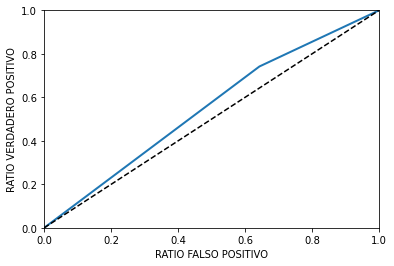

In [94]:
fpr, tpr, thresholds = roc_curve(y_test, y_predicciones)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('RATIO FALSO POSITIVO')
    plt.ylabel('RATIO VERDADERO POSITIVO')
    
plot_roc_curve(fpr, tpr)
plt.show()

La línea discontinua representa la curva ROC de un clasificador aleatorio; un buen clasificador permanece lo más lejos posible de esa línea (hacia
la esquina superior izquierda). A la vista de los resultados obtenidos, se llega a la conclusión de que el clasificador no es muy bueno.

Como conclusión final se establece que este clasificador no es lo suficientemente bueno para predecir. Por este motivo se prueba a continuación a introducir otras variables de entrada al modelo para comprobar si las prestaciones cambian. 

### SGDClassifier MODELO 2

En este segundo caso se introducen al modelo todas las variables: EDAD, GENERO, Bethesda, CIRUGIA, ID_CIRUJANO e ID_AYUDANTE. Los pasos a seguir son similares que en el modelo 1.

In [99]:
x2 = data_nonhc[["EDAD", "GENERO", "Bethesda", "CIRUGIA", "ID_CIRUJANO", "ID_AYUDANTE"]]
y2 = data_nonhc["COMPLICACIONES"]

#Mezcla de los datos, esto garantiza que todos los cross-validation folds sean similares
x2, y2 = shuffle(x2, y2, random_state=0)

#Cantidad de datos para training: 2/3, cantidad de datos para test: 1/3
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.3) 

print('El número de pacientes para el conjunto de entrenanimiento es: ', x_train2.shape[0])
print('El número de pacientes para el conjunto de test es: ', x_test2.shape[0])

El número de pacientes para el conjunto de entrenanimiento es:  203
El número de pacientes para el conjunto de test es:  87


Para el conjunto de TRAIN se tienen 134 pacientes sin complicaciones y  69  con complicaciones.
Para el conjunto de TEST se tienen 57 pacientes sin complicaciones y  30  con complicaciones.


<AxesSubplot:ylabel='COMPLICACIONES'>

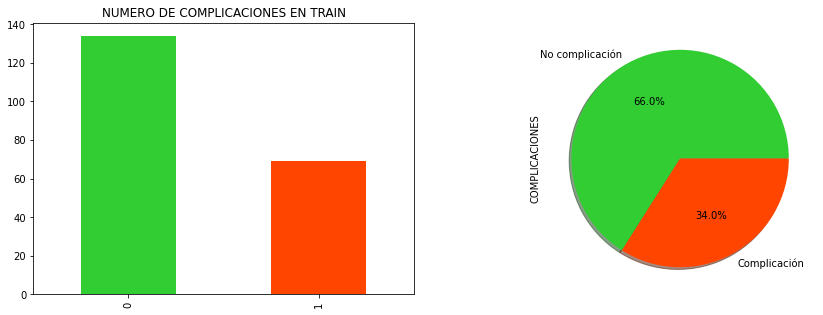

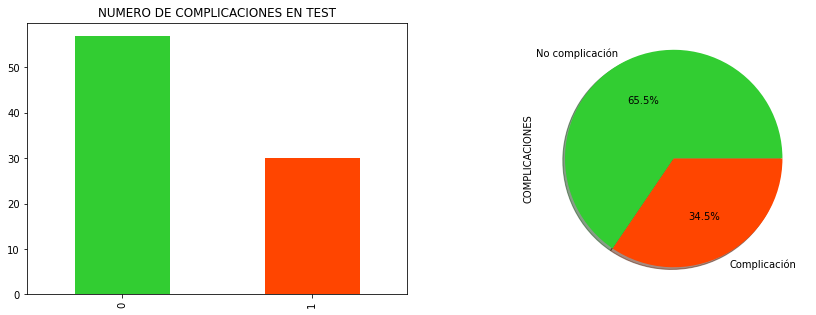

In [100]:
print('Para el conjunto de TRAIN se tienen', y_train2.value_counts()[0], 'pacientes sin complicaciones y ', y_train2.value_counts()[1], ' con complicaciones.')
print('Para el conjunto de TEST se tienen', y_test2.value_counts()[0], 'pacientes sin complicaciones y ', y_test2.value_counts()[1], ' con complicaciones.')

plt.figure(figsize=[15,5])
plt.subplot(121)
y_train2.value_counts().plot.bar(title='NUMERO DE COMPLICACIONES EN TRAIN', color=['limegreen', 'orangered'])

plt.subplot(122)
y_train2.value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
y_test2.value_counts().plot.bar(title='NUMERO DE COMPLICACIONES EN TEST', color=['limegreen', 'orangered'])

plt.subplot(122)
y_test2.value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

In [101]:
#Entreno del clasificador
sgd_clf = SGDClassifier(random_state=42, class_weight='balanced')
sgd_clf.fit(x_train2, y_train2)

SGDClassifier(class_weight='balanced', random_state=42)

<AxesSubplot:ylabel='REALIDAD'>

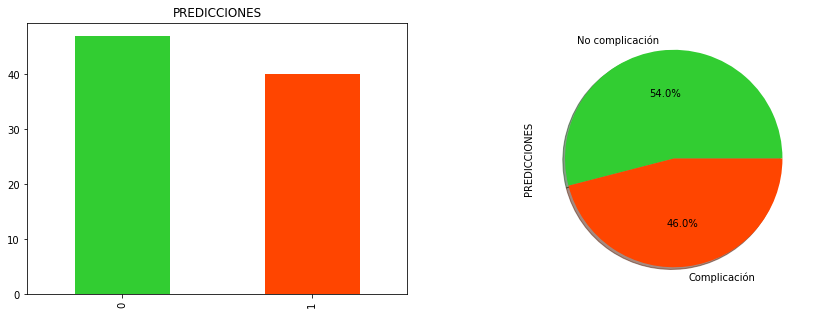

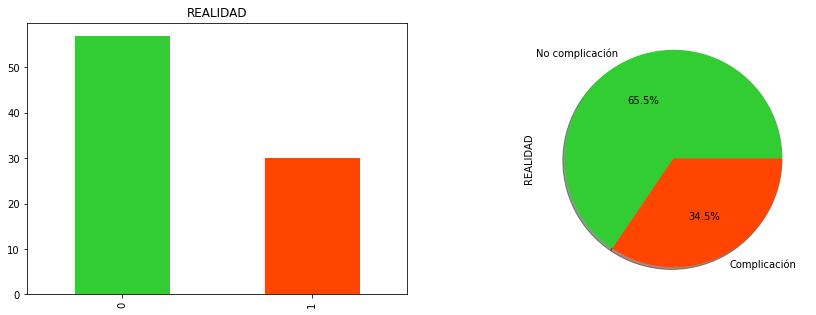

In [102]:
#Predicciones usando el conjunto de test
y_predicciones2 = sgd_clf.predict(x_test2)
tabla2 = pd.DataFrame({"PREDICCIONES": y_predicciones2, "REALIDAD": y_test2})

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla2['PREDICCIONES'].value_counts().plot.bar(title='PREDICCIONES', color=['limegreen', 'orangered'])

plt.subplot(122)
tabla2['PREDICCIONES'].value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla2['REALIDAD'].value_counts().plot.bar(title='REALIDAD', color=['limegreen', 'orangered'])

plt.subplot(122)
tabla2['REALIDAD'].value_counts().plot.pie(labels=['No complicación', 'Complicación'], colors=['limegreen', 'orangered'], autopct='%1.1f%%', shadow=True)

In [103]:
#Accuracy
print('El accuracy obtenido es:', accuracy_score(y_test2, y_predicciones2))

El accuracy obtenido es: 0.5632183908045977


El accuracy obtenido es superior al que se conseguía con el modelo anterior:
- Accuracy del modelo 1: 0.4942528735632184
- Accuracy del modelo 2: 0.5632183908045977

La matriz de confusión es:
 [[33 24]
 [14 16]]


<Figure size 432x288 with 0 Axes>

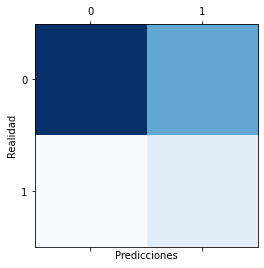

In [104]:
#Matriz de confusión
matriz2 = confusion_matrix(y_test2, y_predicciones2)
print('La matriz de confusión es:\n', matriz2)

plt.figure()
plt.matshow(matriz2, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

Para este caso:

- VERDADERO POSITIVO: 33 personas sin complicaciones (codificación 0), fueron clasificadas correctamente. 
- FALSO NEGATIVO: 24 personas sin complicaciones fueron clasificadas con complicaciones.
- FALSO POSITIVO: 14 personas con complicaciones fueron clasificadas sin complicaciones.
- VERDADERO NEGATIVO: 16 personas con complicaciones (codificación 1), fueron clasificadas correctamente.

In [105]:
#Sensibilidad y especificidad
sensibilidad = matriz2[0][0]/(matriz2[0][0]+matriz2[0][1])
especificidad = matriz2[1][1]/(matriz2[1][1]+matriz2[1][0])

print('La sensibilidad es :', sensibilidad)
print('La especificidad es:', especificidad)

La sensibilidad es : 0.5789473684210527
La especificidad es: 0.5333333333333333


En este segundo modelo aumenta la sensibilidad (capacidad del modelo para detectar la complicación), mientras que la especificidiad (capacidad para detectar los sujetos sin complicación) disminuye. Ninguna de las dos predomina, es decir, ambas presentan un valor similar.

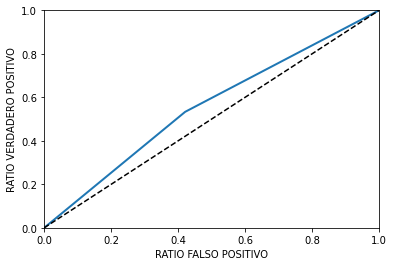

In [106]:
fpr2, tpr2, thresholds = roc_curve(y_test2, y_predicciones2)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('RATIO FALSO POSITIVO')
    plt.ylabel('RATIO VERDADERO POSITIVO')
    
plot_roc_curve(fpr2, tpr2)
plt.show()

Para este caso, el vértice de la línea azul se encuentra desplazado hacia el centro del gráfico en comparación con la curva obtenidaen el modelo 1. Esto es debido a que sensibilidad y especificidad están equilibradas.

#### Conclusión

Observando las prestaciones de ambos modelos, se llega a la conclusión final de que el mejor es el segundo ya que obtiene un mejor valor de accuracy y, además, los valores de sensibilidad y especifidad están balanceados.  

### DecisionTreeClassifier

A continuación se prueba con un modelo diferente, un árbol de decisión, y se comparan los resultados obtenidos del clasificador SGD para ver con cuál se obtienen las mejores prestaciones.

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score

En primer lugar se buscan los parámetros óptimos del modelo para introducirlos posteriormente al clasificador.

In [108]:
#GridSearchCV
param_grid = { "criterion": ["gini", "entropy"],
                "max_depth": np.arange(2, 15),
                "min_samples_split": np.arange(2, 15),
                "min_samples_leaf": np.arange(9, 20)}

#Árbol de decisión
dtree_model = DecisionTreeClassifier(class_weight='balanced')

#Uso de gridsearch para probar todos los valores
dtree_model =  GridSearchCV(dtree_model, param_grid, scoring = None, cv=5)

#Entrenamiento del modelo
dtree_model = dtree_model.fit(x_train2, y_train2)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 16, 'min_samples_split': 2}


In [109]:
dtree_model = DecisionTreeClassifier(criterion = "gini", max_depth = 4, min_samples_leaf = 16, min_samples_split = 2, class_weight = 'balanced')

In [110]:
#Entrenamiento del modelo
dtree_model.fit(x_train2, y_train2)

#Predicción usando el conjunto de test
y_predicted2 = dtree_model.predict(x_test2)

Confusion matrix:
 [[43 14]
 [12 18]]


<ipython-input-111-5e4660206ee3>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-111-5e4660206ee3>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


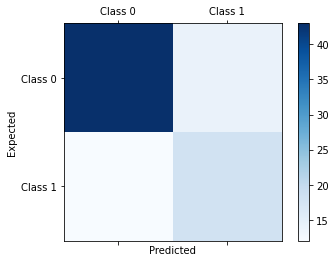

In [111]:
cf = confusion_matrix(y_test2, y_predicted2)
print('Confusion matrix:\n', cf) 
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cf, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Para este último caso:

- VERDADERO POSITIVO: 43 personas sin complicaciones (codificación 0), fueron clasificadas correctamente. 
- FALSO NEGATIVO: 14 personas sin complicaciones fueron clasificadas con complicaciones.
- FALSO POSITIVO: 12 personas con complicaciones fueron clasificadas sin complicaciones.
- VERDADERO NEGATIVO: 18 personas con complicaciones (codificación 1), fueron clasificadas correctamente.

Utilizando este modelo el número de falsos negativos se reduce en comparación con el clasificador SGD, es decir, aumenta la sensibilidad del modelo.

F_score es: 0.5806451612903225
Cohen kappa score es: 0.3488773747841105
Accuracy = 0.7011494252873564
Sensibilidad = 0.7543859649122807
Especificidas = 0.6
AUC: 0.677


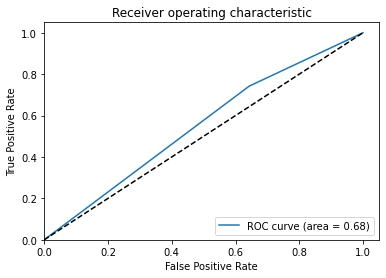

In [112]:
#Medida de precisión
f_score = f1_score(y_test2, y_predicted2, average='binary')
print('F_score es:', f_score)

kappa = cohen_kappa_score(y_test2, y_predicted2)
print('Cohen kappa score es:', kappa) #Entre -1 y 0 significa que no hay acuerdo, entre 0 y 1 significa que hay acuerdo.

print('Accuracy =', accuracy_score(y_test2, y_predicted2))
print("Sensibilidad =", cf[0][0]/(cf[0][0]+cf[0][1]))
print("Especificidas =", cf[1][1]/(cf[1][0]+cf[1][1]))

auc = roc_auc_score(y_test2, y_predicted2)
print('AUC: %.3f' % auc)

#Curva ROC del modelo
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Los resultados obtenidos con el árbol de decisión presentan cierta mejora con respecto a los modelos que utilizan el clasificador SGD. Esto se observa sobretodo en las prestaciones obtenidas:

In [58]:
tabla1 = pd.DataFrame([
                [0.4943, 0.3571, 0.7419], 
                [0.5632, 0.5789, 0.5333], 
                [0.7012, 0.7544, 0.6]],
                index=['SGD modelo 1', 'SGD modelo 2', 'Árbol de decisión'], 
                columns=['Accuracy', 'Sensibilidad', 'Especificidad'])

tabla1

,Accuracy,Sensibilidad,Especificidad
SGD modelo 1,0.4943,0.3571,0.7419
SGD modelo 2,0.5632,0.5789,0.5333
Árbol de decisión,0.7012,0.7544,0.6000


#### Conclusión

A la vista de los resultados mostrados en la tabla superior se observa que los mejores valores se obtienen con el árbol de decisión, por tanto, este es el que mejores predicciones realiza sobre la existencia o no de complicación.

## <center><font style="color:steelblue">4.2. CLASIFICADOR MULTICLASE: TIPO DE CLASE</font></center>

Para realizar esta clasificación es necesario realizar de nuevo la codificación de la variable COMPLICACIONES. En este caso se codifica cada tipo de complicación con un número, a diferencia del caso anterior donde solo se disntiguía entre complicación o no complicación.

Para ello, se repiten los primeros pasos (apartado 1, 2 y 3).

### PREPROCESADO

In [113]:
data_2 = pd.read_excel('tiroidectomia.xlsx')

#Eliminación de los valores NaN y 0
data_2 = data_2.dropna()
data_2 = data_2[(data_2[['Bethesda']] != 0).all(axis=1)]

In [114]:
#Comprobación de eliminación correcta de los valores Nan
(data_2 == np.NaN).sum(axis=0)

NHC                 0
FECHA_NACIMIENTO    0
GENERO              0
Bethesda            0
CIRUGIA             0
COMPLICACIONES      0
ID_CIRUJANO         0
ID_AYUDANTE         0
ESTANCIA            0
dtype: int64

In [115]:
#Comprobación de eliminación correcta de los valores 0
(data_2 == 0).sum(axis=0) 

NHC                 0
FECHA_NACIMIENTO    0
GENERO              0
Bethesda            0
CIRUGIA             0
COMPLICACIONES      0
ID_CIRUJANO         0
ID_AYUDANTE         0
ESTANCIA            0
dtype: int64

In [116]:
new_index = range(0, data_2.shape[0])
data_2.index = new_index
data_2.head()

,NHC,FECHA_NACIMIENTO,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,1968-06-01,M,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,1961-12-03,M,2.0,[tiroidectomia total],rec,50687244M,"[50330643L, 08400498R]",2
2,530005,1946-01-09,M,2.0,[tiroidectomia total],Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,1951-09-15,M,6.0,[tiroidectomia total],no complicaciones,44389372Q,[02874996L],2
4,538134,1957-04-15,M,2.0,[hemitiroidectomia izquierda],no complicaciones,50330643L,"[51415768g, 08974671W]",2


In [117]:
listaedad = []
for i in data_2.FECHA_NACIMIENTO:
    edad = relativedelta(datetime.now(), datetime(i.year, i.month, i.day))
    listaedad.append(edad.years)

In [120]:
#¡ATENCIÓN! --> Runear dos veces para que se muestre correctamente la edad
contador = 0

for i in data_2["FECHA_NACIMIENTO"]:
    for j in range(0, len(listaedad)):
        index = j + contador
        data_2['FECHA_NACIMIENTO'] = data_2['FECHA_NACIMIENTO'].replace(i, int(listaedad[index]))
        contador = contador + 1
        break

In [121]:
data_2.head()

,NHC,FECHA_NACIMIENTO,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,M,2.0,[tiroidectomia total],"rec, Hipocalcemia , Hematoma",08400498R,"[12748779V, 08974671W]",2
1,77245,59.0,M,2.0,[tiroidectomia total],rec,50687244M,"[50330643L, 08400498R]",2
2,530005,75.0,M,2.0,[tiroidectomia total],Disfagia,44389372Q,"[50850155F, 12748779V]",2
3,532841,69.0,M,6.0,[tiroidectomia total],no complicaciones,44389372Q,[02874996L],2
4,538134,63.0,M,2.0,[hemitiroidectomia izquierda],no complicaciones,50330643L,"[51415768g, 08974671W]",2


In [122]:
data_2 = data_2.rename(columns = {"FECHA_NACIMIENTO": "EDAD"})

### CODIFICACIÓN

In [123]:
data_2['GENERO'] = data_2['GENERO'].replace(['H', 'M'],[-1, 1])

In [124]:
data_2['CIRUGIA'] = data_2['CIRUGIA'].replace(['[tiroidectomia total]', '[hemitiroidectomia izquierda]', 
                                           '[hemitiroidectomia derecha]', '[Completar tiroidectomia]', 
                                           '[Paratiroides u otros]'],[1, 2, 3, 4, 5])

In [125]:
data_2['COMPLICACIONES'] = data_2['COMPLICACIONES'].replace(['no complicaciones', ' Cicatriz Hipertrofica', 
                                                         ' Cicatriz Hipertrofica ', ' Dehiscencia ', ' Disfagia ', 
                                                         ' Disfonia', ' Disfonia ', ' Hematoma ', ' Hematoma', 
                                                         ' Hemorragia', ' Hipocalcemia', ' Hipocalcemia ', 
                                                         ' Hipoparatiroidismo ', ' Hipoparatiroidismo', ' Infeccion ', 
                                                         ' Seroma ', ' rec ', ' rec, Hipocalcemia , Hematoma ', ' Cicatriz Hipertrofica , Seroma ', 
                                                         ' Hematoma , Hemorragia ', ' Hipoparatiroidismo , Hipocalcemia ', 
                                                         ' rec , Cicatriz Hipertrofica ', 
                                                         ' Cicatriz Hipertrofica , Hematoma , Seroma , Dehiscencia , Disfonia ', 
                                                         ' Disfonia , Hemorragia ', ' Hipoparatiroidismo , rec , Seroma ', 
                                                         ' Hipoparatiroidismo , Disfonia ', 
                                                         ' Hipoparatiroidismo, Hipocalcemia ', 
                                                         ' Seroma , Disfagia ', ' Hipoparatiroidismo , Hematoma ' , 
                                                         ' Hipoparatiroidismo , Infeccion ' , 
                                                         ' Hipoparatiroidismo , Hemorragia ', ' Seroma , Hematoma ', 
                                                         ' Hematoma , Hipoparatiroidismo ', ' Dehiscencia , Infeccion ', 
                                                         ' Hipocalcemia , rec ', ' Disfonia , Dehiscencia ', 
                                                         ' Hematoma, Infeccion ', ' Hematoma , Seroma '],[1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 8, 8, 9, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [126]:
data_2['ID_CIRUJANO'] = data_2['ID_CIRUJANO'].replace(['00677341Z', '00827260L', '01118322Q', 
                                                  '02654603N', '02710503e', '02710503E',
                                                  '02874996L', '02883999Y', '02884329Z',
                                                  '05966991d', '05999727Q', '08400498R',
                                                  '08949321K', '08974671W', '12748779V',
                                                  '44389372Q', '47041950G', '47450369N',
                                                  '50330643L', '50687244M', '50850155F',
                                                  '51415768g', '51415768G', '52977204Q',
                                                  '53606685X'],[1, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23])

In [127]:
data_2['ID_AYUDANTE'] = data_2['ID_AYUDANTE'].replace(['[00677341Z, 02874996L]', '[00677341Z, 08974671W]', '[00677341Z, 47450369N]', 
                                                  '[00677341Z, X4768987Y]', '[00677341Z]', '[00827260L, 02883999Y]',
                                                  '[00827260L, X4768987Y]', '[00827260L]', '[01118322Q, 02654603N]',
                                                  '[01118322Q, 02884329Z]', '[01118322Q, 05966991d]', '[01118322Q, 47041950G]',
                                                  '[01118322Q, 52977204Q]', '[01118322Q]', '[02654603N, 01118322Q]',
                                                  '[02654603N, 02710503E]', '[02654603N, 04497329R]', '[02654603N, 05966991d]',
                                                  '[02654603N, 52977204Q]', '[02654603N]', '[02710503E, 01118322Q]',
                                                  '[02710503E, 02654603N]', '[02710503E, 02710503E]', '[02710503E, 52977204Q]',
                                                  '[02710503E]', '[02874996L, 12748779V]', '[02874996L, 14303494R]',
                                                  '[02874996L, 44389372Q]', '[02874996L, 51415768g]', '[02874996L, X4768987Y]',
                                                  '[02874996L, X9849952H]', '[02874996L]', '[02883999Y, 44389372Q]',
                                                  '[02883999Y]', '[02884329Z, 01118322Q]', '[02884329Z, 52977204Q]',
                                                  '[02884329Z]', '[05436273Q]', '[05966991d, 01118322Q, 01118322Q, 02710503E]',
                                                  '[05966991d, 01118322Q]', '[05966991d, 02884329Z]', '[05966991d, 05966991d]',
                                                  '[05966991d, 52977204Q]', '[05966991d]', '[05999727Q, 01118322Q, 05999727Q, 01118322Q]',
                                                  '[05999727Q, 01118322Q]', '[05999727Q, 05966991d, 05999727Q]', '[05999727Q, 05966991d]',
                                                  '[05999727Q]', '[08400498R, 47450369N]', '[08400498R]', '[08949321K, 00677341Z]',
                                                  '[08949321K, 08974671W]', '[08949321K, 12748779V]', '[08949321K, 50330643L]',
                                                  '[08949321K]', '[08974671W, 02874996L]', '[08974671W]', '[12748779V, 02883999Y]',
                                                  '[12748779V, 08974671W]', '[14303494R]', '[33978272G]', '[44389372Q, 00827260L, 00677341Z]',
                                                  '[44389372Q, 02874996L]', '[44389372Q, 12748779V]', '[44389372Q, 50687244M]', 
                                                  '[44389372Q, 51415768G]', '[44389372Q, X4768987Y]', '[44389372Q]', '[46877344D, X4768987Y]',
                                                  '[47041950G, 01118322Q]', '[47041950G, 02654603N]', '[47041950G, 52977204Q, 02884329Z]', 
                                                  '[47041950G]', '[47450369N, 02874996L]', '[47450369N]', '[49689803M]', '[50330643L, 08400498R]',
                                                  '[50330643L, 51415768g]', '[50687244M, 47450369N]', '[50687244M, 50330643L]', 
                                                  '[50687244M, X4768987Y]', '[50687244M]', '[50850155F, 00677341Z]', '[50850155F, 12748779V]',
                                                  '[50850155F]', '[51415768g, 08974671W]', '[51415768g]', '[51415768G]',
                                                  '[52977204Q, 01118322Q, 52977204Q, 01118322Q]', '[52977204Q, 01118322Q]', '[52977204Q, 02654603N]',
                                                  '[52977204Q, 02884329Z]', '[52977204Q, 52977204Q]', '[52977204Q]', '[53543295P, 47450369N]',
                                                  '[53606685X, 01118322Q]', '[X4768987Y, 00677341Z]', '[X4768987Y, 02883999Y]', '[X4768987Y]'],[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 87, 88, 89, 90, 91, 92, 93, 93, 94, 95, 96, 97])

In [128]:
data_2.head()

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
0,239217,52.0,1,2.0,1,13,11,59,2
1,77245,59.0,1,2.0,1,12,19,77,2
2,530005,75.0,1,2.0,1,4,15,84,2
3,532841,69.0,1,6.0,1,1,15,31,2
4,538134,63.0,1,2.0,2,1,18,86,2


### ANÁLISIS EXPLORATORIO (VARIABLE COMPLICACIONES)

Solo se realiza el análisis de la variable COMPLICACIONES porque es la única que varía, el resto permanecen igual.

#### GRÁFICOS

In [129]:
complicaciones_2 = data_2['COMPLICACIONES']

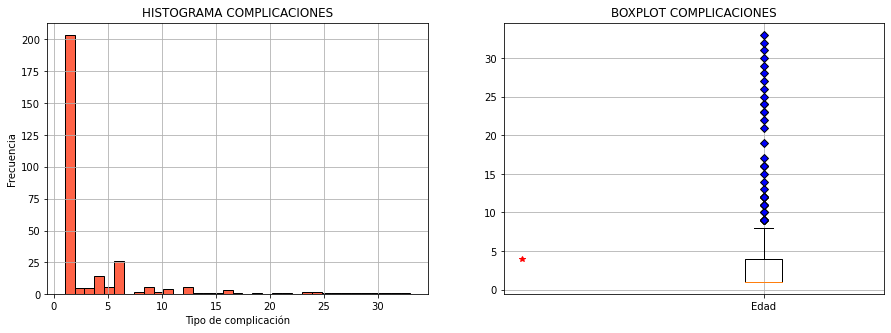

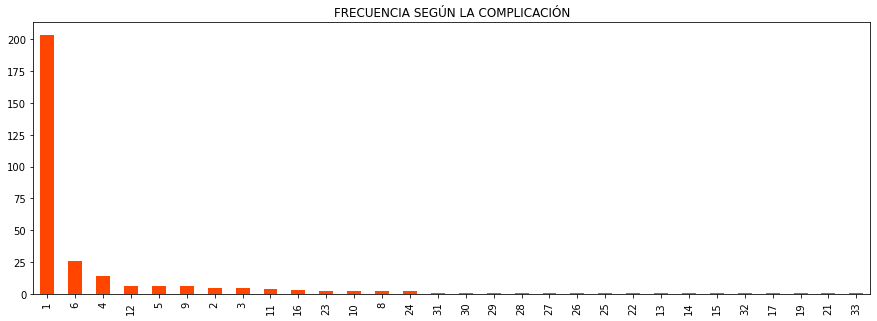

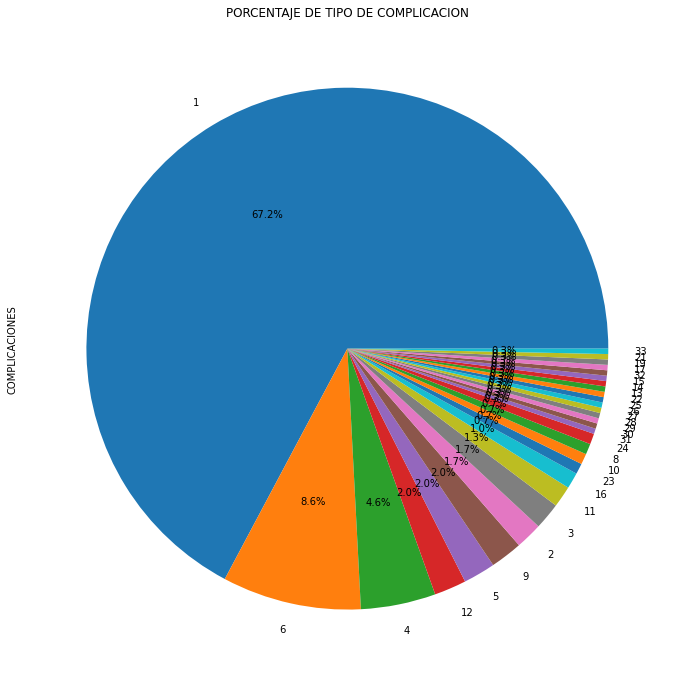

In [130]:
#-------------------------------------------------------- COMPLICACIONES --------------------------------------------------------
plt.figure(figsize=[15,5])
plt.subplot(121)
plt.title('HISTOGRAMA COMPLICACIONES')
plt.xlabel('Tipo de complicación')
plt.ylabel('Frecuencia')
plt.hist(complicaciones_2, bins=35, alpha=1, color = "tomato", edgecolor = 'black', linewidth=1)
plt.grid(True)

blue_diamond = dict(markerfacecolor='b', marker='D')
plt.subplot(122)
plt.title('BOXPLOT COMPLICACIONES')
plt.boxplot(complicaciones_2, flierprops=blue_diamond)
plt.xticks([1], ['Edad'])
plt.plot(np.average(complicaciones_2), color='r', marker='*')
plt.grid(True)
plt.show()

plt.figure(figsize=[15,5])
complicaciones_2.value_counts().plot.bar(title='FRECUENCIA SEGÚN LA COMPLICACIÓN', color='orangered')
plt.show()

plt.figure(figsize=[12,12])
complicaciones_2.value_counts().plot.pie(autopct='%1.1f%%', title='PORCENTAJE DE TIPO DE COMPLICACION')
plt.show()

En el boxplot superior se pueden observar un elevado número de outliers (valores atípicos), sin embargo, estos no se consideran atípicos sino que son complicaciones que no ocurren con frecuencia, pero que pueden pasar. Por este motivo no se eliminan.

Además, si se compara el gráfico circular de la codificación multiclase con el obtenido en la codificación binaria para la variable complicaciones, se puede observar que los datos coinciden. En este caso, el porcentaje perteneciente a las complicaciones se divide en los diferentes tipos existentes.

De nuevo, se comprueban los outliers de la variable de estancia y se eliminan si no son coherentes.

In [131]:
data_2[data_2.ESTANCIA >= 5]

,NHC,EDAD,GENERO,Bethesda,CIRUGIA,COMPLICACIONES,ID_CIRUJANO,ID_AYUDANTE,ESTANCIA
71,98968,68.0,-1,2.0,1,1,5,93,8
97,38573,61.0,1,2.0,1,6,5,20,7
111,473489,48.0,1,6.0,4,1,4,93,16
113,434495,73.0,1,2.0,1,10,9,20,8
132,357197,60.0,-1,4.0,4,1,4,43,15
138,582209,51.0,1,6.0,1,26,22,15,8
139,435890,91.0,1,2.0,1,1,4,88,9
145,225524,41.0,1,2.0,1,12,8,73,23
148,80863,44.0,-1,4.0,4,1,5,73,30
170,89254,43.0,1,4.0,4,1,4,93,16


In [132]:
data_sinoutlier_2 = data_2.drop([71, 111, 132, 139, 148, 170, 197, 217, 249, 265, 287, 293])

In [133]:
data_nonhc_2 = data_sinoutlier_2.drop(columns=['NHC'])

#### CÁLCULO DE ESTADÍSTICOS

De nuevo solo se calcula la variable COMPLICACIONES que es la que varía.

In [134]:
rango_complicaciones = data_nonhc_2.COMPLICACIONES.describe()[7] - data_nonhc_2.COMPLICACIONES.describe()[3]
mediana_complicaciones = complicaciones_2.median()
moda_complicaciones = stat.mode(complicaciones_2)
var_complicaciones = complicaciones_2.var()

print('El rango para la variable complicaciones es: ', data_nonhc_2.COMPLICACIONES.describe()[7], '-', data_nonhc_2.COMPLICACIONES.describe()[3], '=', rango_complicaciones) 
print('La media es: ', data_nonhc_2.COMPLICACIONES.describe()[1])
print('La mediana es: ', mediana_complicaciones)
print('La moda es: ', moda_complicaciones)
print('La varianza es: ', var_complicaciones)
print('La desviación estándar es: ', data_nonhc_2.COMPLICACIONES.describe()[2])
print('Los percentiles 25, 50 y 75 (respectivamente) son: ', data_nonhc_2.COMPLICACIONES.describe()[4], ',', data_nonhc_2.COMPLICACIONES.describe()[5], ',', data_nonhc_2.COMPLICACIONES.describe()[6])

El rango para la variable complicaciones es:  33.0 - 1.0 = 32.0
La media es:  4.096551724137931
La mediana es:  1.0
La moda es:  1
La varianza es:  39.015907240764776
La desviación estándar es:  6.344574161142943
Los percentiles 25, 50 y 75 (respectivamente) son:  1.0 , 1.0 , 5.0


#### CORRELACIÓN ENTRE VARIABLES. Test Chi-Cuadrado

Se calcula la dependencia entre variables de nuevo ya que existe posibilidad de haber variaciones en las relaciones entre estas con la nueva codificación.

In [135]:
#-------------------------------------------- EDAD --------------------------------------------
tabla_contingencia1 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['GENERO'])
tabla_contingencia2 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['Bethesda'])
tabla_contingencia3 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['CIRUGIA'])
tabla_contingencia4 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['COMPLICACIONES'])
tabla_contingencia5 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['ID_CIRUJANO'])
tabla_contingencia6 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['ID_AYUDANTE'])
tabla_contingencia7 = pd.crosstab(data_nonhc_2['EDAD'], data_nonhc_2['ESTANCIA'])

#-------------------------------------------- GENERO --------------------------------------------
tabla_contingencia8 = pd.crosstab(data_nonhc_2['GENERO'], data_nonhc_2['Bethesda'])
tabla_contingencia9 = pd.crosstab(data_nonhc_2['GENERO'], data_nonhc_2['CIRUGIA'])
tabla_contingencia10 = pd.crosstab(data_nonhc_2['GENERO'], data_nonhc_2['COMPLICACIONES'])
tabla_contingencia11 = pd.crosstab(data_nonhc_2['GENERO'], data_nonhc_2['ID_CIRUJANO'])
tabla_contingencia12 = pd.crosstab(data_nonhc_2['GENERO'], data_nonhc_2['ID_AYUDANTE'])
tabla_contingencia13 = pd.crosstab(data_nonhc_2['GENERO'], data_nonhc_2['ESTANCIA'])

#-------------------------------------------- BETHESDA --------------------------------------------
tabla_contingencia14 = pd.crosstab(data_nonhc_2['Bethesda'], data_nonhc_2['CIRUGIA'])
tabla_contingencia15 = pd.crosstab(data_nonhc_2['Bethesda'], data_nonhc_2['COMPLICACIONES'])
tabla_contingencia16 = pd.crosstab(data_nonhc_2['Bethesda'], data_nonhc_2['ID_CIRUJANO'])
tabla_contingencia17 = pd.crosstab(data_nonhc_2['Bethesda'], data_nonhc_2['ID_AYUDANTE'])
tabla_contingencia18 = pd.crosstab(data_nonhc_2['Bethesda'], data_nonhc_2['ESTANCIA'])

#-------------------------------------------- CIRUGIA --------------------------------------------
tabla_contingencia19 = pd.crosstab(data_nonhc_2['CIRUGIA'], data_nonhc_2['COMPLICACIONES'])
tabla_contingencia20 = pd.crosstab(data_nonhc_2['CIRUGIA'], data_nonhc_2['ID_CIRUJANO'])
tabla_contingencia21 = pd.crosstab(data_nonhc_2['CIRUGIA'], data_nonhc_2['ID_AYUDANTE'])
tabla_contingencia22 = pd.crosstab(data_nonhc_2['CIRUGIA'], data_nonhc_2['ESTANCIA'])

#-------------------------------------------- COMPLICACIONES --------------------------------------------
tabla_contingencia23 = pd.crosstab(data_nonhc_2['COMPLICACIONES'], data_nonhc_2['ID_CIRUJANO'])
tabla_contingencia24 = pd.crosstab(data_nonhc_2['COMPLICACIONES'], data_nonhc_2['ID_AYUDANTE'])
tabla_contingencia25 = pd.crosstab(data_nonhc_2['COMPLICACIONES'], data_nonhc_2['ESTANCIA'])

#-------------------------------------------- ID_CIRUJANO --------------------------------------------
tabla_contingencia26 = pd.crosstab(data_nonhc_2['ID_CIRUJANO'], data_nonhc_2['ID_AYUDANTE'])
tabla_contingencia27 = pd.crosstab(data_nonhc_2['ID_CIRUJANO'], data_nonhc_2['ESTANCIA'])

#-------------------------------------------- ID_AYUDANTE --------------------------------------------
tabla_contingencia28 = pd.crosstab(data_nonhc_2['ID_AYUDANTE'], data_nonhc_2['ESTANCIA'])

In [136]:
p_valor1 = chi2_contingency(tabla_contingencia1)[1]
p_valor2 = chi2_contingency(tabla_contingencia2)[1]
p_valor3 = chi2_contingency(tabla_contingencia3)[1]
p_valor4 = chi2_contingency(tabla_contingencia4)[1]
p_valor5 = chi2_contingency(tabla_contingencia5)[1]
p_valor6 = chi2_contingency(tabla_contingencia6)[1]
p_valor7 = chi2_contingency(tabla_contingencia7)[1]
p_valor8 = chi2_contingency(tabla_contingencia8)[1]
p_valor9 = chi2_contingency(tabla_contingencia9)[1]
p_valor10 = chi2_contingency(tabla_contingencia10)[1]
p_valor11 = chi2_contingency(tabla_contingencia11)[1]
p_valor12 = chi2_contingency(tabla_contingencia12)[1]
p_valor13 = chi2_contingency(tabla_contingencia13)[1]
p_valor14 = chi2_contingency(tabla_contingencia14)[1]
p_valor15 = chi2_contingency(tabla_contingencia15)[1]
p_valor16 = chi2_contingency(tabla_contingencia16)[1]
p_valor17 = chi2_contingency(tabla_contingencia17)[1]
p_valor18 = chi2_contingency(tabla_contingencia18)[1]
p_valor19 = chi2_contingency(tabla_contingencia19)[1]
p_valor20 = chi2_contingency(tabla_contingencia20)[1]
p_valor21 = chi2_contingency(tabla_contingencia21)[1]
p_valor22 = chi2_contingency(tabla_contingencia22)[1]
p_valor23 = chi2_contingency(tabla_contingencia23)[1]
p_valor24 = chi2_contingency(tabla_contingencia24)[1]
p_valor25 = chi2_contingency(tabla_contingencia25)[1]
p_valor26 = chi2_contingency(tabla_contingencia26)[1]
p_valor27 = chi2_contingency(tabla_contingencia27)[1]
p_valor28 = chi2_contingency(tabla_contingencia28)[1]

lista_pvalor = [p_valor1, p_valor2, p_valor3, p_valor4, p_valor5, p_valor6, p_valor7, p_valor8, p_valor19, p_valor10, p_valor11,
               p_valor12, p_valor13, p_valor14, p_valor15, p_valor16, p_valor17, p_valor18, p_valor19, p_valor20, p_valor21,
               p_valor22, p_valor23, p_valor24, p_valor25, p_valor26, p_valor27, p_valor28]

for i in range(len(lista_pvalor)):
    p_valor = lista_pvalor[i]
               
    if p_valor < 0.05:
        print('Las variables de la tabla de contingencia', i+1, 'están relacionadas')

Las variables de la tabla de contingencia 2 están relacionadas
Las variables de la tabla de contingencia 3 están relacionadas
Las variables de la tabla de contingencia 4 están relacionadas
Las variables de la tabla de contingencia 5 están relacionadas
Las variables de la tabla de contingencia 7 están relacionadas
Las variables de la tabla de contingencia 8 están relacionadas
Las variables de la tabla de contingencia 13 están relacionadas
Las variables de la tabla de contingencia 14 están relacionadas
Las variables de la tabla de contingencia 22 están relacionadas
Las variables de la tabla de contingencia 23 están relacionadas
Las variables de la tabla de contingencia 24 están relacionadas
Las variables de la tabla de contingencia 25 están relacionadas
Las variables de la tabla de contingencia 26 están relacionadas
Las variables de la tabla de contingencia 28 están relacionadas


Para este caso se puede observar que las variables relacionadas han cambiado, siendo estas:
- Edad con Bethesda
- Edad con cirugía
- **Edad con complicación**
- Edad con el cirujano
- Edad con la estancia
- Género con Bethesda
- ~Género con cirugía~
- Género con estancia
- Bethesda con cirugía
- ~Cirugía con complicación~
- Cirugía con estancia
- **Complicación con el cirujano**
- **Complicación con el ayudante**
- Complicación con estancia
- Id del cirujano con el id del ayudante
- Id del ayudante con la estancia

*Los puntos que se encuentran en negrita son los nuevos grupos de variables que están relacionadas, provocado por la codificación multiclase de COMPLICACIONES y aquellas que estaban relacionadas con la codificación binaria pero con la nueva no se encuentran tachadas. Las que no sufren modificaciones se mantienen tanto para un tipo de codificación como para el otro.*

### SGDClasisifier MODELO MULTICLASE

Para esta otra parte del modelo se lleva a cabo un clasificador multiclase que, predice a partir de todas las variables el tipo de complicación que puede presentar el paciente, una vez finalizada la tiroidectomía. 

En este caso, no se puede tener en cuenta la relación entre variables superior ya que los modelos OneVsOneCalssifer y OneVsRestClassifer necesitan que se incluyan todas.

In [142]:
x3 = data_nonhc_2[["EDAD", "GENERO", "Bethesda", "CIRUGIA", "ID_CIRUJANO", "ID_AYUDANTE"]]
y3 = data_nonhc_2["COMPLICACIONES"]

#Mezcla de los datos, esto garantiza que todos los cross-validation folds sean similares
x3, y3 = shuffle(x3, y3, random_state=0)

#Cantidad de datos para training: 2/3, cantidad de datos para test: 1/3
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3, y3, test_size=0.3) 

print('El número de pacientes para el conjunto de entrenanimiento es: ', x_train3.shape[0])
print('El número de pacientes para el conjunto de test es: ', x_test3.shape[0])

El número de pacientes para el conjunto de entrenanimiento es:  203
El número de pacientes para el conjunto de test es:  87


#### OneVsOneClassifier

In [143]:
from sklearn.multiclass import OneVsOneClassifier

In [144]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, class_weight='balanced'))

# Entrenamiento del modelo
ovo_clf.fit(x_train3, y_train3)

OneVsOneClassifier(estimator=SGDClassifier(class_weight='balanced',
                                           random_state=42))

<AxesSubplot:ylabel='REALIDAD'>

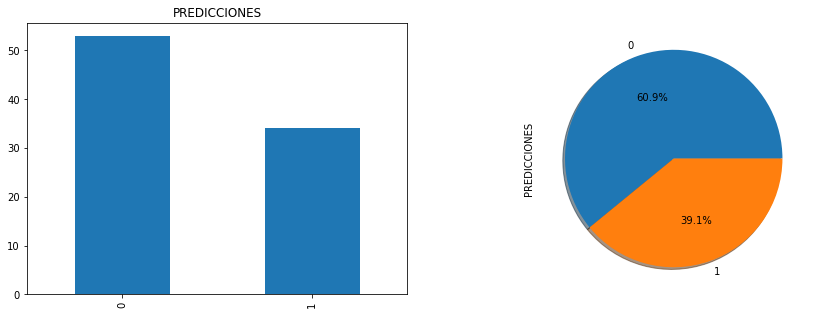

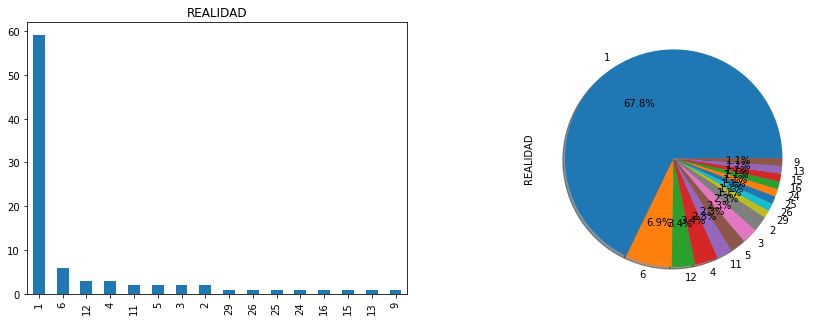

In [155]:
#Predicciones usando el conjunto de test
y_predicciones3 = sgd_clf.predict(x_test3)
tabla3 = pd.DataFrame({"PREDICCIONES": y_predicciones3, "REALIDAD": y_test3})

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla3['PREDICCIONES'].value_counts().plot.bar(title='PREDICCIONES')

plt.subplot(122)
tabla3['PREDICCIONES'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla3['REALIDAD'].value_counts().plot.bar(title='REALIDAD')

plt.subplot(122)
tabla3['REALIDAD'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

Observando los resultados obtenidos, aparentemente el modelo es capaz de clasificar si existe o no complicación pero no entre el tipo de esta. A continuación se comprueba esta teoría.

El accuracy obtenido es: 0.2413793103448276
La matriz de confusión es:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [38 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


<Figure size 432x288 with 0 Axes>

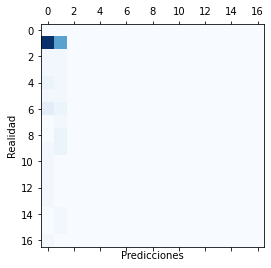

In [149]:
print('El accuracy obtenido es:', accuracy_score(y_test3, y_predicciones3))

matriz3 = confusion_matrix(y_test3, y_predicciones3)
print('La matriz de confusión es:\n', matriz3)

plt.figure()
plt.matshow(matriz3, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

El modelo acierta el 24% de las veces (accuracy = 0.24), esto es un porcentaje muy bajo. Por tanto, el modelo no es recomendable para predecir los diferentes tipos de complicación.

#### OneVsRestClassifier

In [150]:
from sklearn.multiclass import OneVsRestClassifier

In [151]:
ovr_clf = OneVsRestClassifier(SGDClassifier(random_state=42, class_weight='balanced'))
ovr_clf.fit(x_train3, y_train3)

OneVsRestClassifier(estimator=SGDClassifier(class_weight='balanced',
                                            random_state=42))

El accuracy obtenido es: 0.2413793103448276
La matriz de confusión es:
 [[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [38 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


<Figure size 432x288 with 0 Axes>

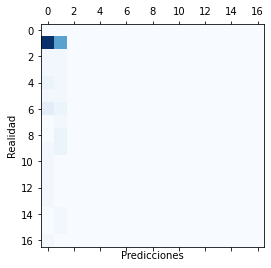

In [152]:
print('El accuracy obtenido es:', accuracy_score(y_test3, y_predicciones3))

matriz3 = confusion_matrix(y_test3, y_predicciones3)
print('La matriz de confusión es:\n', matriz3)

plt.figure()
plt.matshow(matriz3, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

#### Conclusión

Observando los resultados, se concluye que el clasificador SGD no es adecuado para realizar la clasificación multiclase en función del tipo de tiroidectomía ya que, de nuevo, predice únicamente entre 0 y 1 (se puede observar en el gráfico superior).

### EVALUACIÓN DEL MODELO AGRUPANDO TIPOS DE TIROIDECTOMÍAS

Dados los resultados del modelo se propone en este apartado agrupar las complicaciones menos frecuentes para comprobar si el modelo es capaz de obtener mejores prestaciones.

In [156]:
data_nonhc_2['COMPLICACIONES'] = data_nonhc_2['COMPLICACIONES'].replace([8, 10, 11, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33],
                                                          [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [157]:
x4 = data_nonhc_2[["EDAD", "GENERO", "Bethesda", "CIRUGIA", "ID_CIRUJANO", "ID_AYUDANTE"]]
y4 = data_nonhc_2["COMPLICACIONES"]

#Mezcla de los datos, esto garantiza que todos los cross-validation folds sean similares
x4, y4 = shuffle(x4, y4, random_state=0)

#Cantidad de datos para training: 2/3, cantidad de datos para test: 1/3
x_train4, x_test4, y_train4, y_test4 = train_test_split(x4, y4, test_size=0.3) 

print('El número de pacientes para el conjunto de entrenanimiento es: ', x_train4.shape[0])
print('El número de pacientes para el conjunto de test es: ', x_test4.shape[0])

El número de pacientes para el conjunto de entrenanimiento es:  203
El número de pacientes para el conjunto de test es:  87


In [159]:
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42, class_weight='balanced'))

#Entrenamiento del modelo
ovo_clf.fit(x_train4, y_train4)

OneVsOneClassifier(estimator=SGDClassifier(class_weight='balanced',
                                           random_state=42))

<AxesSubplot:ylabel='REALIDAD'>

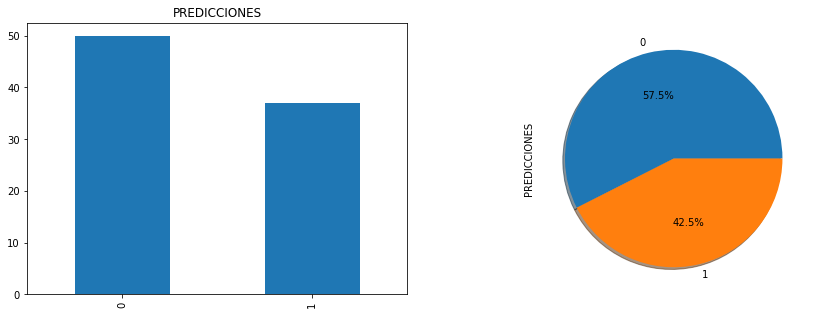

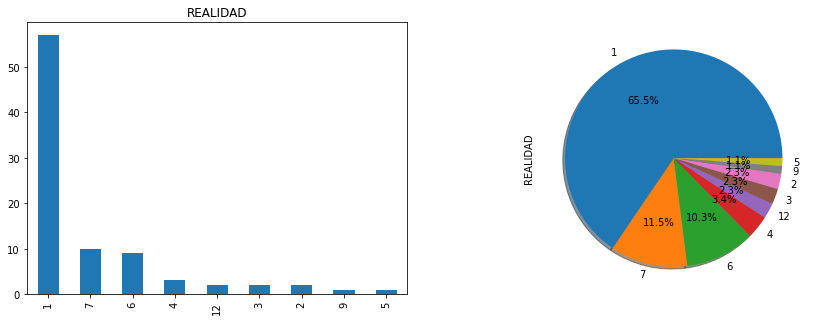

In [161]:
#Predicciones usando el conjunto de test
y_predicciones4 = sgd_clf.predict(x_test4)
tabla4 = pd.DataFrame({"PREDICCIONES": y_predicciones4, "REALIDAD": y_test4})

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla4['PREDICCIONES'].value_counts().plot.bar(title='PREDICCIONES')

plt.subplot(122)
tabla4['PREDICCIONES'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

plt.figure(figsize=[15,5])
plt.subplot(121)
tabla4['REALIDAD'].value_counts().plot.bar(title='REALIDAD')

plt.subplot(122)
tabla4['REALIDAD'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)

El accuracy obtenido es: 0.26436781609195403
La matriz de confusión es:
 [[ 0  0  0  0  0  0  0  0  0  0]
 [34 23  0  0  0  0  0  0  0  0]
 [ 1  1  0  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 2  7  0  0  0  0  0  0  0  0]
 [ 9  1  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0]]


<Figure size 432x288 with 0 Axes>

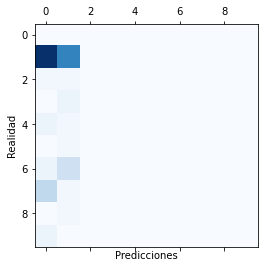

In [162]:
print('El accuracy obtenido es:', accuracy_score(y_test4, y_predicciones4))

matriz4 = confusion_matrix(y_test4, y_predicciones4)
print('La matriz de confusión es:\n', matriz4)

plt.figure()
plt.matshow(matriz4, cmap=plt.cm.Blues)
plt.xlabel('Predicciones')
plt.ylabel('Realidad')
plt.show()

El modelo acierta el 26% de las veces (accuracy = 0.26).

#### Conclusión

Los resultados obtenidos con este segundo caso mejoran pero esta mejoría sigue siendo insuficiente, por tanto se concluye finalmente que el clasificador SGD no es adecuado para realizar la clasificación multiclase.

### RandomForestClassifier

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

In [173]:
classifier = RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state=0, class_weight='balanced')

rnd_clf = classifier.fit(x_train4, y_train4)

In [174]:
y_pred4 = rnd_clf.predict(x_test4)
f_score = f1_score(y_test4, y_pred4, average='weighted')
kappa = cohen_kappa_score(y_test4, y_pred4)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test4, y_pred4)))
print('F_score is:', f_score) 
print('cohen kappa score is:', kappa) 
print('Accuracy =', accuracy_score(y_test4, y_pred4))

Model accuracy score : 0.6667
F_score is: 0.6018904467180329
cohen kappa score is: 0.20435193945127728
Accuracy = 0.6666666666666666


In [175]:
print(classification_report(y_test4, y_pred4))

              precision    recall  f1-score   support

           1       0.70      0.93      0.80        57
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         2
           4       1.00      0.33      0.50         3
           5       0.00      0.00      0.00         1
           6       0.50      0.22      0.31         9
           7       0.50      0.10      0.17        10
           9       0.00      0.00      0.00         1
          12       0.50      0.50      0.50         2

    accuracy                           0.67        87
   macro avg       0.36      0.23      0.25        87
weighted avg       0.61      0.67      0.60        87



C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\helen\.conda\envs\AIM_GIB_20_21\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Conclusiones

Las prestaciones obtenidas con el modelo random forest son claramente mejores en la predicción multiclase, observado esto en el valor del accuracy:

- OneVsOneClassifer: Accuracy = 0.26
- RandomForest: Accuracy = 0.67

# <center><font style="color:steelblue">5. MODELO PREDICTOR DE ESTANCIA</font></center>
## <center><font style="color:steelblue">5.1. VARIABLE COMPLICACIÓN BINARIA</font></center>

En el caso de la variable estancia, está relacionada con: EDAD, GENERO, CIRUGIA, COMPLICACIONES e ID_AYUDANTE (observado en el test chi2 de la codificación bianria), por tanto estas serán las introducidas al modelo.

Los pasos a realizar son los mismos que en los modelos anteriores, por tanto no se explican en detalle.

In [176]:
x5 = data_nonhc[["EDAD", "GENERO", "CIRUGIA", "COMPLICACIONES", "ID_AYUDANTE"]]
y5 = data_nonhc["ESTANCIA"]

x5, y5 = shuffle(x5, y5, random_state=0)

#División de los datos en train y test
x_train5, x_test5, y_train5, y_test5 = train_test_split(x5, y5)

### SGDClassifier

In [177]:
sgd_clf = SGDClassifier(random_state=42, class_weight='balanced')

#Entrenamiento del modelo
sgd_clf.fit(x_train5, y_train5)

SGDClassifier(class_weight='balanced', random_state=42)

In [179]:
y_prediccion5 = sgd_clf.predict(x_test5)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test5, y_prediccion5)))

Model accuracy score : 0.1233


Respecto a la sensibilidad y especificidad, en este caso no tiene mucho sentido calcularlas.

Observando el valor obtenido, 0.1, se llega a la conclusión de que es un valor demasiado bajo y, por tanto, el modelo no predice bien la estancia a partir de las otras variables.

### RandomForestClassifier

In [180]:
classifier = RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state=0, class_weight='balanced')
rnd_clf = classifier.fit(x_train5, y_train5)

In [181]:
y_pred5 = rnd_clf.predict(x_test5)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test5, y_pred5)))

Model accuracy score : 0.5890


El accuracy obtenido utilizando el clasificador RandomForest es aproximadamente 0.6. Es claramente superior al valor obtenido con el clasificador SGD. 

#### Conclusión
Comparando los resultados obtenidos se llega a la conclusión de que el mejor modelo para predecir la estancia es RandomForest debido a la diferencia significativa obtenida en los valores del accuracy. Sin embargo, como no se conocen los valores de sensibilidad y especificidad no se conoce con que certeza el modelo acierta en su predicción.

## <center><font style="color:steelblue">5.1. VARIABLE COMPLICACIÓN MULTICLASE</font></center>

Para este segundo caso la variable COMPLICACIONES que se introduce al modelo presenta la codificación multiclase, es decir, está identificado cada tipo de complicación con un número, agrupando las menos significativas en una clase.

In [182]:
x6 = data_nonhc_2[["EDAD", "GENERO", "CIRUGIA", "COMPLICACIONES", "ID_AYUDANTE"]]
y6 = data_nonhc_2["ESTANCIA"]

x6, y6 = shuffle(x6, y6, random_state=0)

x_train6, x_test6, y_train6, y_test6 = train_test_split(x6, y6)

### SGDClassifier

In [183]:
sgd_clf = SGDClassifier(random_state=42, class_weight='balanced')
sgd_clf.fit(x_train6, y_train6)

SGDClassifier(class_weight='balanced', random_state=42)

In [185]:
y_prediccion6 = sgd_clf.predict(x_test6)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test6, y_prediccion6)))

Model accuracy score : 0.0274


### RandomForestClassifier

In [186]:
classifier = RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state=0, class_weight='balanced')
rnd_clf = classifier.fit(x_train6, y_train6)

In [187]:
y_pred6 = rnd_clf.predict(x_test6)

print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test6, y_pred6)))

Model accuracy score : 0.5342


#### Conclusión

De nuevo, el mejor resultado se obtiene con el clasificador RandomForest, pero al no conocer los valores de sensibilidad y especificidad no se puede determinar si el modelo es adecuado para predecir la estancia a partir de las variables de entrada.

# <center><font style="color:steelblue">6. CONCLUSIÓN FINAL</font></center>

Tras todo el análisis realizado se concluye finalmente que la cirugía de tiroidectomía es más frecuente en el género femenino, con un rango de edad desde 25 a 91 años, siendo la edad más frecuente 53 años.  La categoría de Bethesda más habitual es la II, que es benigna, y el 50% de las veces se realiza una tiroidectomía total. La posibilidad de complicaciones postquirúrgicas es muy baja, siendo el 33% de las veces y la estancia media, una vez que se ha realizado la operación es de aproximadamente 3 días. Por último, se ha comprobado que a mayor experiencia del cirujano, mayor es el éxito de la cirugía, reduciendo tanto las complicaciones como el tiempo de hospitalización del paciente. 

Respecto a los modelos predictivos, en el caso de la codificación binaria de la variable COMPLICACIONES se obtienen buenos resultados con ambos modelos. Sin embargo, cuando se codifica multiclase, los mejores resultados se obtienen con el clasificador RandomForest.

Por último, la predicción de la variable ESTANCIA no obtiene prestaciones muy exitosa, independientemente del modelo empleado.